## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Project Assignment : Unsupervised Learning

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Object Recognition

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Attribute Information:
<font color=darkblue>
All the features are geometric features extracted from the silhouette
<br>All are numeric in nature
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Learning Outcomes:
<font color=darkblue>
<ul>
<li>Exploratory Data Analysis</li>
<li>Reduce number dimensions in the dataset with minimal information loss</li>
<li>Train a model using Principle Components</li>
</ul>
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>Apply dimensionality reduction technique - PCA and train a model using principle components instead of training the model using just the raw data.</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [606]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import zscore

import os

import warnings
warnings.filterwarnings('ignore')

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Read the data

In [607]:
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Looks like dataset has null values, Indepth review needed 
</font>

In [608]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<b>Target Column :</b> 
<br><b>class -</b> column is non-numeric, refers to the type of vehicle, it is the target variable

<b>Numerical Columns :</b> 
<br>All other columns Numeric
<br><b>compactness -</b> (average perim)2/area
<br><b>circularity -</b> (average radius)2/area
<br><b>distance_circularity -</b> area/(av.distance from border)2
<br><b>radius_ratio -</b> (max.rad-min.rad)/av.radius
<br><b>pr.axis_aspect_ratio -</b> (minor axis)/(major axis)
<br><b>max.length_aspect_ratio -</b> (length perp. max length)/(max length)
<br><b>scatter_ratio -</b> (inertia about minor axis)/(inertia about major axis)
<br><b>elongatedness -</b> area/(shrink width)2
<br><b>pr.axis_rectangularity -</b> area/(pr.axis length*pr.axis width)
<br><b>max.length_rectangularity -</b> area/(max.length*length perp. to this)
<br><b>scaled_variance -</b> (2nd order moment about minor axis)/area
<br><b>scaled_variance.1 -</b> (2nd order moment about major axis)/area
<br><b>scaled_radius_of_gyration -</b> (3rd order moment about major axis)/sigma_min3
<br><b>scaled_radius_of_gyration.1 -</b> (3rd order moment about minor axis)/sigma_maj3
<br><b>skewness_about -</b> (mavar+mivar)/area
<br><b>skewness_about.1 -</b> (4th order moment about major axis)/sigma_min4
<br><b>skewness_about.2 -</b> (4th order moment about minor axis)/sigma_maj4
<br><b>hollows_ratio -</b> (area of hollows)/(area of bounding polygon)
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Shape of Data :
<font color=darkblue>
</font>

In [609]:
vehicle_df.shape

(846, 19)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
The dataset has 846 rows and 19 columns. 
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [610]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [611]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Dataset has missing values in multiple columns
<br><b>circularity</b> column has 5 null values
<br><b>distance_circularity</b> column has 4 null values
<br><b>radius_ratio</b> column has 6 null values
<br><b>pr.axis_aspect_ratio</b> column has 2 null values
<br><b>scatter_ratio</b> column has 1 missing value
<br><b>elongatedness</b> column has 1 missing value
<br><b>pr.axis_rectangularity</b> column has 3 missing values
<br><b>scaled_variance</b> column has 3 null values
<br><b>scaled_variance.1</b> column has 2 null values
<br><b>scaled_radius_of_gyration</b> column has 2 null values
<br><b>scaled_radius_of_gyration.1</b> column has 2 null values
<br><b>skewness_about</b> column has 6 null values
<br><b>skewness_about.1</b> column has 1 null value
<br><b>skewness_about.2</b> column has 1 null value
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [612]:
vehicle_df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Explore Target Variable :
<font color=darkblue>
</font>

In [613]:
vehicle_df.groupby("class").count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [614]:
vehicle_df["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Car has the maximum count, more than half of the total rows compared to bus and van vehicle types. van has the least count
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Label Encode Target variable - class
<font color=darkblue>
</font>

In [615]:
labelencoder = LabelEncoder()
vehicle_df["class"] = labelencoder.fit_transform(vehicle_df["class"])
vehicle_df["class"].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Class column has been label encoded as 0,1 & 2.
<br>0 - bus : 218 rows
<br>1 - car : 429 rows
<br>2 - van : 199 rows
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Pairplot
<font color=darkblue>
</font>

<Figure size 3240x3240 with 0 Axes>

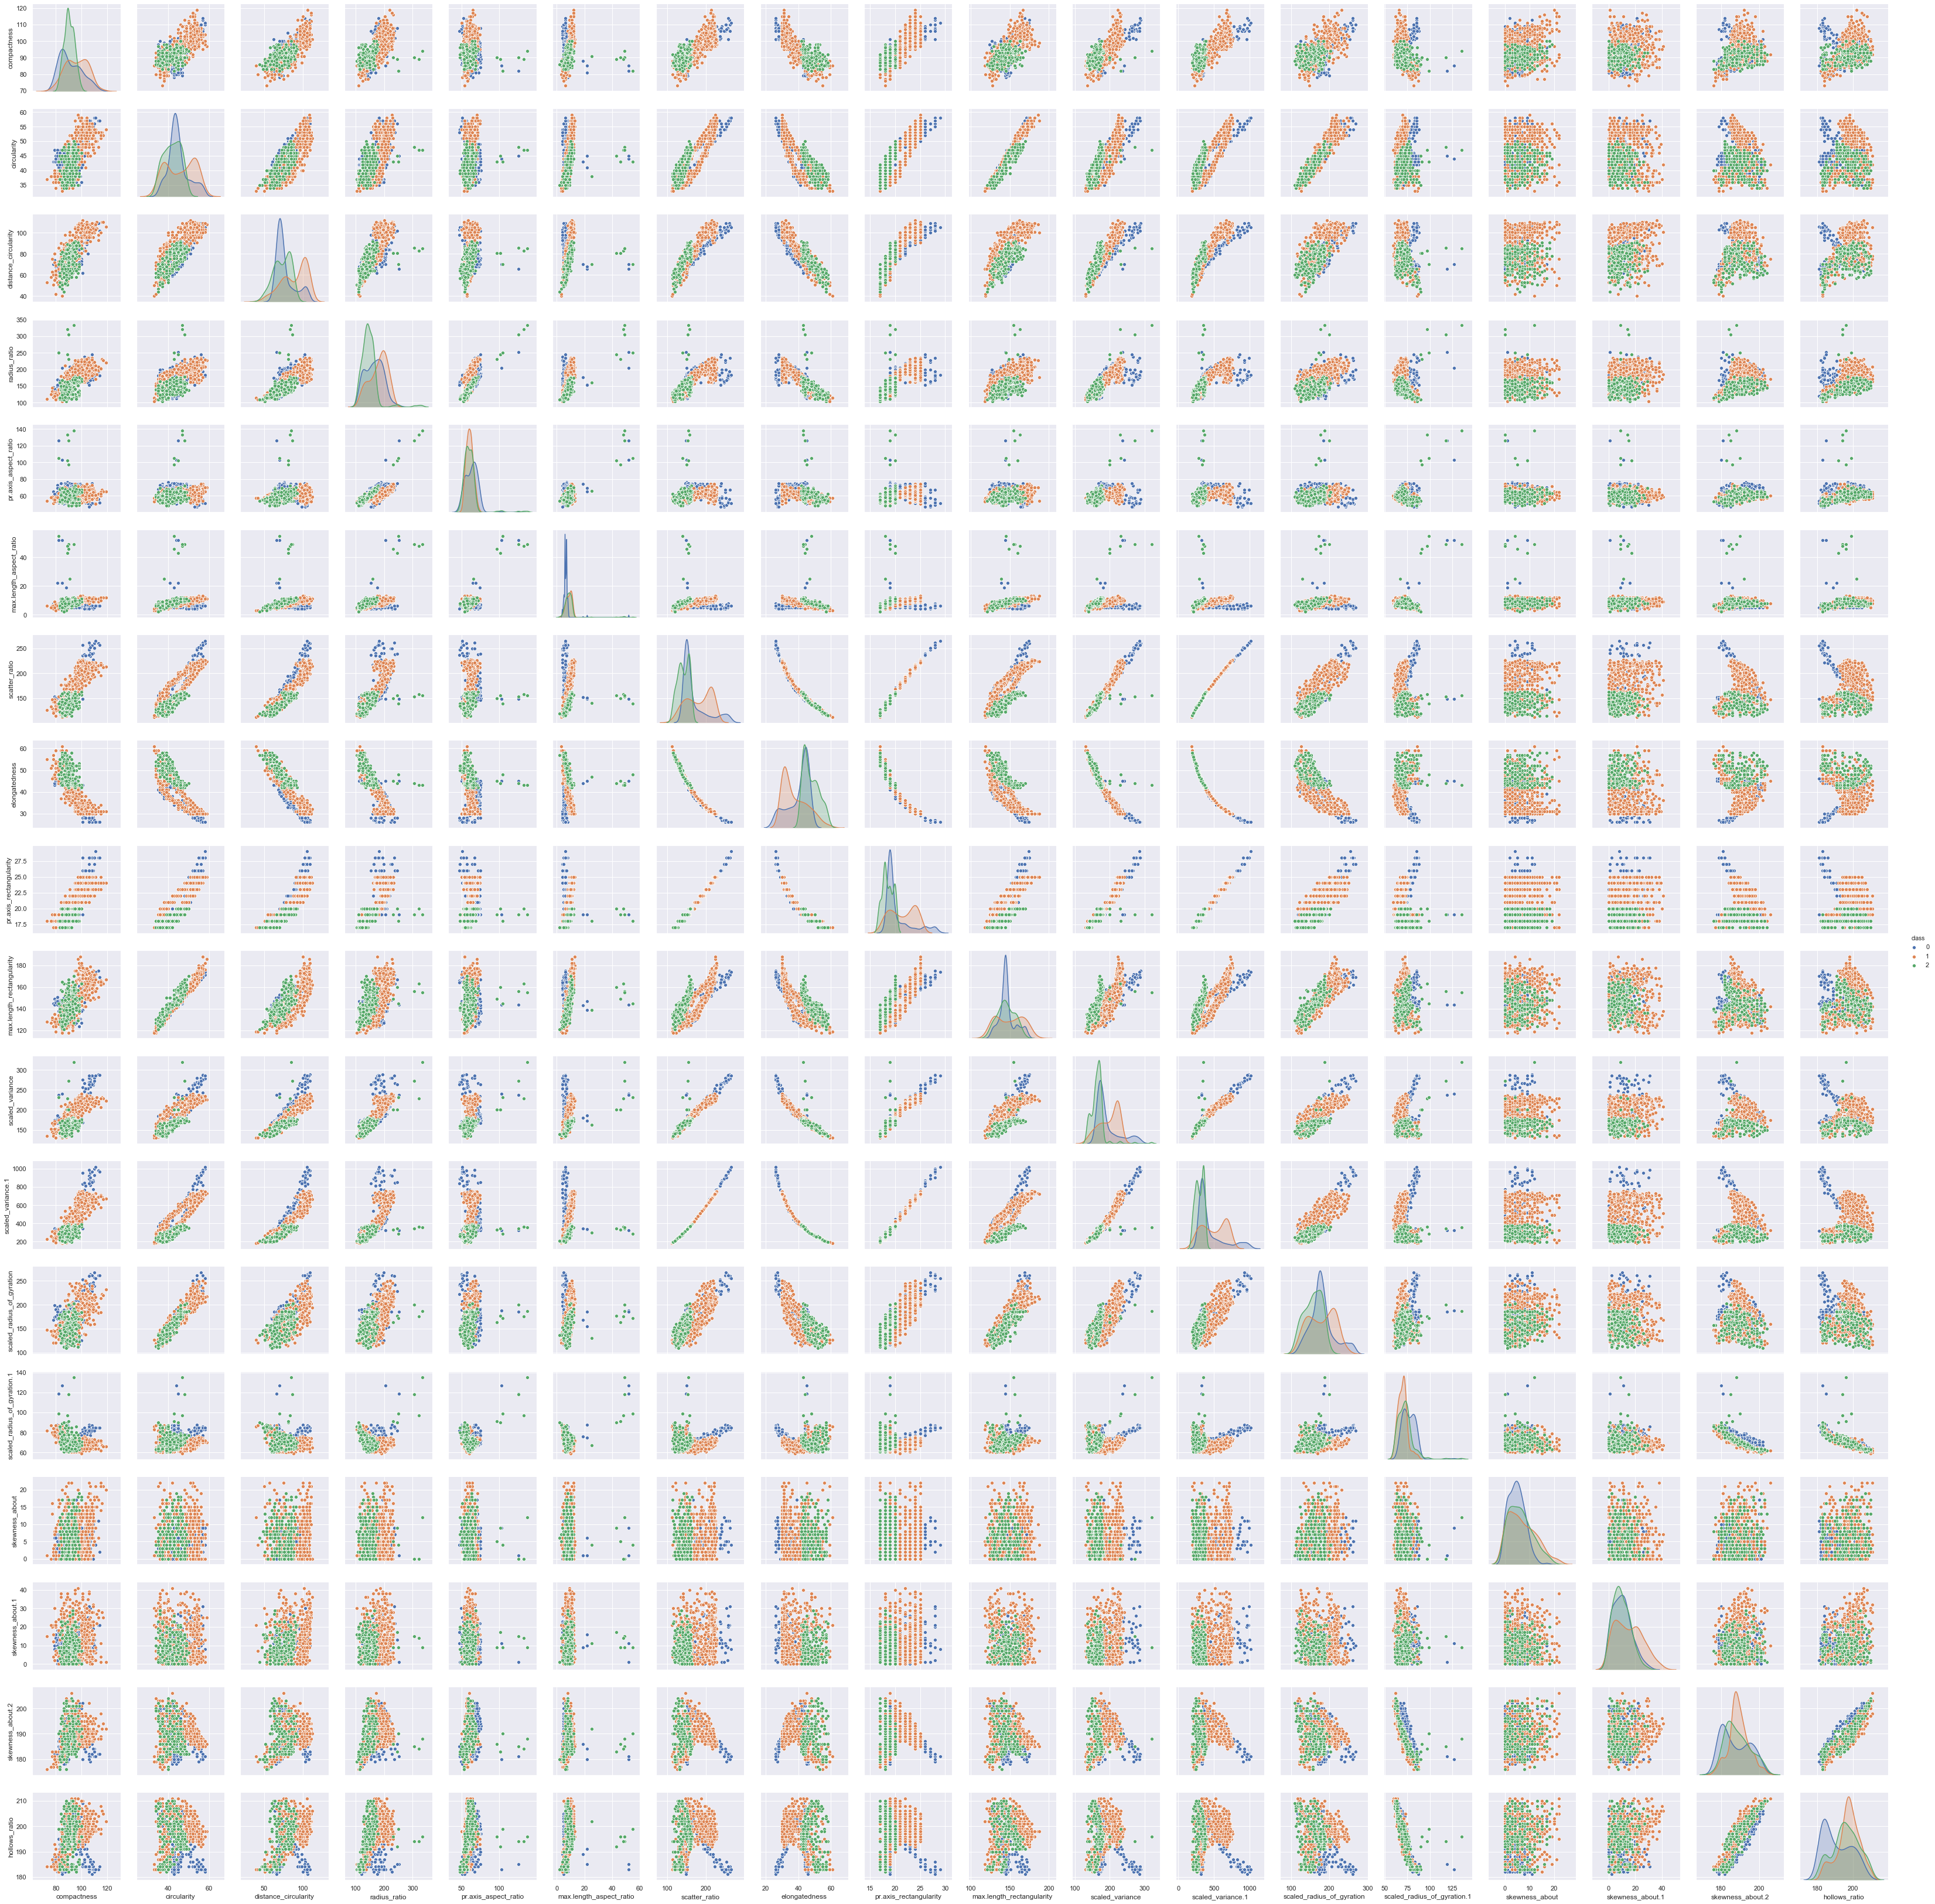

In [616]:
plt.figure(figsize = (45,45))
sns.pairplot(vehicle_df, hue='class', diag_kind='kde')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<br>van has least spread of compactness, car has higher mean of compactness, for bus compactness is right skewed indicating that less number of buses have high compactness
<br>cars has high mean of circularity
<br>cars has high mean of distance_circularity 
<br>cars has high mean of radius_ratio while van has the least mean of radius_ratio
<br>car, van and bus are equally distributed for pr.axis_aspect_ratio
<br>car, van and bus are equally distributed for max.length_aspect_ratio
<br>car has high mean of scatter_ratio compared to bus and van
<br>van has high mean of elomngatedness compared to bus and car
<br>car has high pr.axis_rectangularity compared to bus and van
<br>car, van and bus are equally distributed for max.length_rectangularity
<br>car has high mean of scaled_variance compared to bus and van
<br>car, bus and van are equally distributed on 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2'
<br>bus has lower hollows_ratio compared to car and van
<br>scatter_ratio and scaled_variance has postive linear relationship
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Correlation Check :
<font color=darkblue>
</font>

In [617]:
vehicle_df.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   
class                          -0.033796    -0.160546             -0.065209   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   
class                           -0.182921             -0.098431   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                            

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Heatmap
<font color=darkblue>
</font>

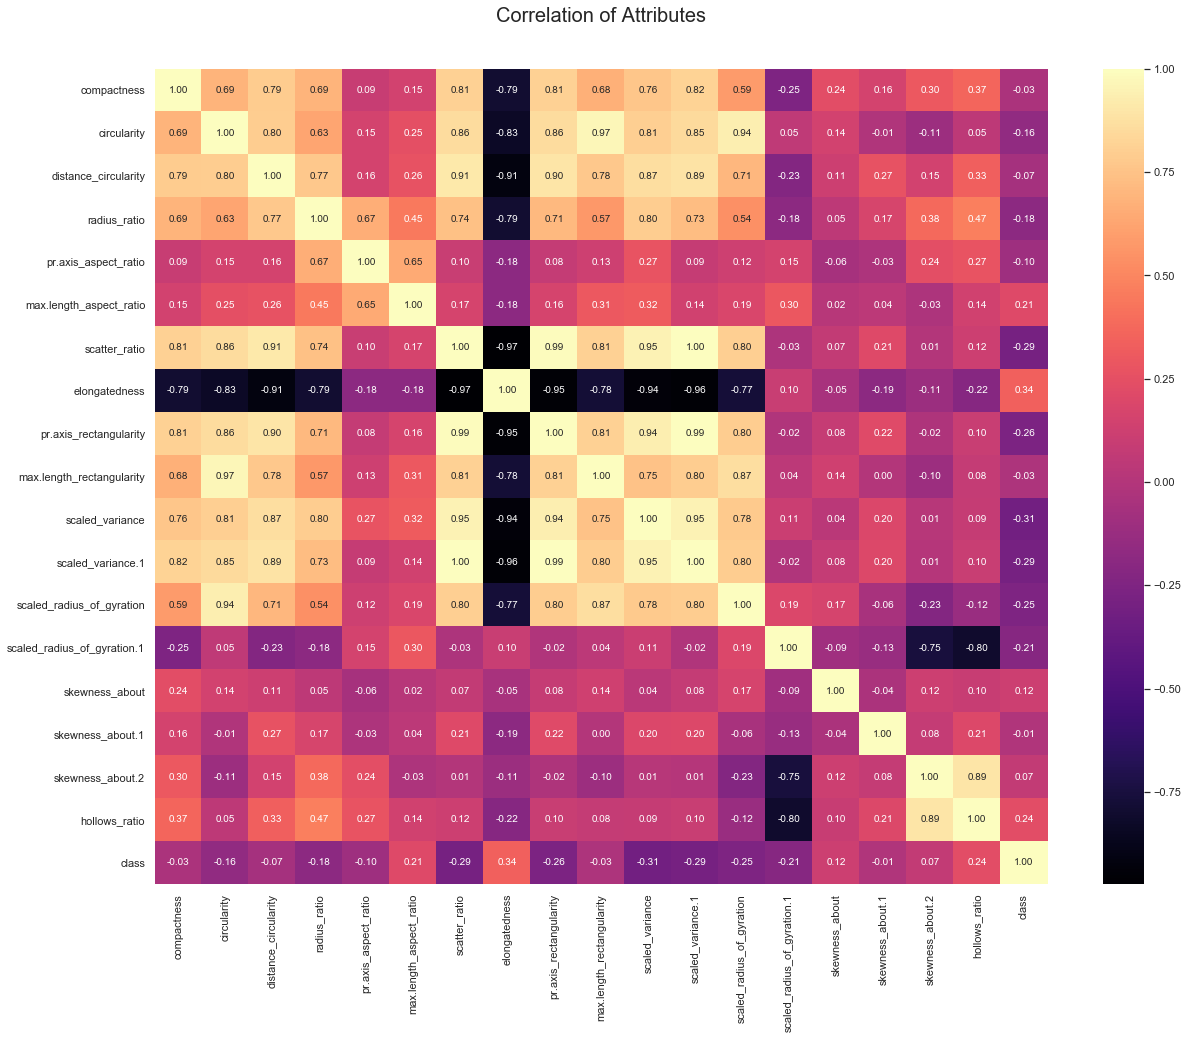

In [618]:
plt.figure(figsize = (20,15))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap( vehicle_df.corr(), cmap='magma',annot=True, fmt='.2f')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Correlation matrix indicates many features are highly correlated. Features scatter_ratio and scaled_variance has postive linear relationship. Multiple dimensions have correlation above +- 0.7. We could not determine which feature to drop. We will use PCA to determine the dimensions to drop.
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Summary Statistics : 
<font color=darkblue>
</font>

In [620]:
vehicle_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing values found in many columns. Columns circularity, distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about, skewness_about.2 has missing values.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Value Treatment :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">List of columns with Missing Values :
<font color=darkblue>
</font>

In [621]:
columns_missing_values = vehicle_df.columns[vehicle_df.isnull().any()]
vehicle_df[columns_missing_values].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">List of rows with Missing Values :
<font color=darkblue>
</font>

In [622]:
vehicle_df[vehicle_df.isnull().any(axis=1)][columns_missing_values].head(10)

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5            NaN                 106.0         172.0                  50.0   
9           44.0                  98.0           NaN                  62.0   
19          56.0                 100.0         215.0                   NaN   
35          46.0                   NaN         172.0                  67.0   
66          43.0                  68.0         125.0                  57.0   
70          55.0                  98.0         161.0                  54.0   
77          40.0                  62.0         140.0                  62.0   
78          52.0                  94.0           NaN                  66.0   
105          NaN                 103.0         202.0                  64.0   
118          NaN                   NaN         128.0                  56.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5            255.0           26.0                    28.0            280.0   
9            183.0           36.0                    22.0            202.0   
19           208.0           32.0                    24.0            227.0   
35           157.0           43.0                    20.0            170.0   
66           149.0           46.0                    19.0            169.0   
70           215.0           31.0                     NaN            226.0   
77           150.0           45.0                    19.0            165.0   
78           208.0           31.0                    24.0            227.0   
105          220.0           30.0                    25.0              NaN   
118          150.0           46.0                    19.0            168.0   

     scaled_variance.1  scaled_radius_of_gyration  \
5                957.0                      264.0   
9                505.0                      152.0   
19               651.0                      223.0   
35               363.0                      184.0   
66               323.0                      172.0   
70               683.0                      221.0   
77               330.0                      173.0   
78               666.0                      218.0   
105              711.0                      214.0   
118              324.0                      173.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
9                           64.0             4.0              14.0   
19                          74.0             6.0               5.0   
35                          67.0            17.0               7.0   
66                           NaN             NaN              18.0   
70                          76.0             3.0               6.0   
77                           NaN             2.0               3.0   
78                          76.0            11.0               4.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   

     skewness_about.2  
5               181.0  
9               195.0  
19              186.0  
35              192.0  
66              179.0  
70              185.0  
77              180.0  
78              193.0  
105             188.0  
118             180.0

In [623]:
vehicle_df[vehicle_df.isnull().any(axis=1)][columns_missing_values].shape

(33, 14)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
There are 33 rows with missing values in one or more of 14 columns
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : circularity
<font color=darkblue>
</font>

In [624]:
vehicle_df[vehicle_df['circularity'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
5            NaN                 106.0         172.0                  50.0   
105          NaN                 103.0         202.0                  64.0   
118          NaN                   NaN         128.0                  56.0   
266          NaN                  65.0         116.0                  53.0   
396          NaN                 106.0         177.0                  51.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
5            255.0           26.0                    28.0            280.0   
105          220.0           30.0                    25.0              NaN   
118          150.0           46.0                    19.0            168.0   
266          152.0           45.0                    19.0            175.0   
396          256.0           26.0                    28.0            285.0   

     scaled_variance.1  scaled_radius_of_gyration  \
5                957.0                      264.0   
105              711.0                      214.0   
118              324.0                      173.0   
266              335.0                        NaN   
396              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  
5               181.0  
105             188.0  
118             180.0  
266             179.0  
396             182.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column circularity has missing values in 5 rows and of these 5 rows one row has missing value in distance_circularity</li>
<li>row 105 has missing values for scaled valiance and skewness_about.1 along with circularity</li>
<li>row 266 has missing value for scaled_radius_of_gyration along with circularity</li>
<li>we will drop the 3 rows (105, 118, 266) which has missing value in any other coulmn as well apart from circularity</li>
<li>we will impute missing value in rest 2 rows</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop rows : 105, 118, 266
<font color=darkblue>
</font>

In [625]:
vehicle_df.drop([105,118,266], inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 5, 396
<font color=darkblue>
check the class level for row 5 and 396, replace the value with median value of respective class
</font>

In [626]:
vehicle_df.loc[5].loc['class'],vehicle_df.loc[396].loc['class']

(0.0, 0.0)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
These two rows belong to class bus, so we will impute with median of circularity for class bus
</font>

In [627]:
median_circularity_bus=vehicle_df['circularity'][vehicle_df['class']==0].median()
print('Median value of circularity for class bus : ', median_circularity_bus)

Median value of circularity for class bus :  44.0


In [628]:
vehicle_df['circularity'].fillna(median_circularity_bus, inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for circularity
</font>

In [629]:
vehicle_df[vehicle_df['circularity'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for circularity
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : distance_circularity
<font color=darkblue>
</font>

In [630]:
vehicle_df[vehicle_df['distance_circularity'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
35          46.0                   NaN         172.0                  67.0   
207         42.0                   NaN         121.0                  55.0   
319         51.0                   NaN         194.0                  60.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
35           157.0           43.0                    20.0            170.0   
207          149.0           46.0                    19.0            167.0   
319          220.0           30.0                    25.0            247.0   

     scaled_variance.1  scaled_radius_of_gyration  \
35               363.0                      184.0   
207              323.0                        NaN   
319              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
207                         85.0             1.0               6.0   
319                         80.0             7.0               7.0   

     skewness_about.2  
35              192.0  
207             179.0  
319             188.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column distance_circularity has missing values in 3 rows</li>
<li>row 207 has missing value in more than one column, we will drop this row</li>
<li>row 35 and 319 had missing value just in one column, we will fill median value of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop rows : 207
<font color=darkblue>
</font>

In [631]:
vehicle_df.drop([207], inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 35, 319
<font color=darkblue>
check the class level for row 35 and 319, replace the value with median value of respective class
</font>

In [632]:
vehicle_df.loc[35].loc['class'],vehicle_df.loc[319].loc['class']

(2.0, 0.0)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
row 35 belong to class van and row 319 belog to class bus, we will impute with mdeian of distance_circularity of respective class
</font>

In [633]:
median_distance_circularity_bus=vehicle_df['distance_circularity'][vehicle_df['class']==0].median()
median_distance_circularity_van=vehicle_df['distance_circularity'][vehicle_df['class']==2].median()
print('Median value of distance_circularity for class bus : ', median_distance_circularity_bus)
print('Median value of distance_circularity for class van : ', median_distance_circularity_van)

Median value of distance_circularity for class bus :  72.5
Median value of distance_circularity for class van :  75.0


In [634]:
vehicle_df.loc[35] = vehicle_df.loc[35].replace(np.nan,median_distance_circularity_van)
vehicle_df.loc[319] = vehicle_df.loc[319].replace(np.nan,median_distance_circularity_bus)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for distance_circularity
</font>

In [635]:
vehicle_df[vehicle_df['distance_circularity'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for distance_circularity
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : radius_ratio
<font color=darkblue>
</font>

In [636]:
vehicle_df[vehicle_df['radius_ratio'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
9           44.0                  98.0           NaN                  62.0   
78          52.0                  94.0           NaN                  66.0   
159         45.0                  75.0           NaN                  57.0   
287         43.0                  84.0           NaN                  55.0   
345         54.0                 106.0           NaN                  57.0   
467         54.0                 104.0           NaN                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
9            183.0           36.0                    22.0            202.0   
78           208.0           31.0                    24.0            227.0   
159          150.0           44.0                    19.0            170.0   
287          154.0           44.0                    19.0            174.0   
345          236.0           28.0                    26.0            256.0   
467          215.0           31.0                    24.0            221.0   

     scaled_variance.1  scaled_radius_of_gyration  \
9                505.0                      152.0   
78               666.0                      218.0   
159              335.0                      180.0   
287              350.0                      164.0   
345              833.0                      253.0   
467              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
78                          76.0            11.0               4.0   
159                         66.0            16.0               2.0   
287                         73.0             6.0               2.0   
345                         81.0             6.0              14.0   
467                         75.0            13.0              23.0   

     skewness_about.2  
9               195.0  
78              193.0  
159             193.0  
287             185.0  
345             185.0  
467             186.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column radius_ratio has missing values in 6 rows, these are rows 9, 78, 159, 287, 345, and 467</li>
<li>all the 6 rows had missing values only for radius_ratio, other columns have values filled in</li>
<li>we will replace the missing values with median value of radius_ratio of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 9, 78, 159, 287, 345, 467
<font color=darkblue>
check the class level for row 5 and 366, replace the value with median value of respective class
</font>

In [637]:
vehicle_df.loc[[9,78,159,287,345,467]]['class']

9      1.0
78     0.0
159    1.0
287    2.0
345    0.0
467    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>rows 78, 345 belong to class bus, we will impute with median of radius_ratio of class bus</li>
<li>rows 9, 159, 467 belong to class car, we will impute with median of radius_ratio of class car</li>
<li>row 287 belong to class van, we will impute with median of radius_ratio of class van</li>
</font>

In [638]:
median_radius_ratio_bus=vehicle_df['radius_ratio'][vehicle_df['class']==0].median()
median_radius_ratio_car=vehicle_df['radius_ratio'][vehicle_df['class']==1].median()
median_radius_ratio_van=vehicle_df['radius_ratio'][vehicle_df['class']==2].median()
print('Median value of radius_ratio for class bus : ', median_radius_ratio_bus)
print('Median value of radius_ratio for class bus : ', median_radius_ratio_car)
print('Median value of radius_ratio for class bus : ', median_radius_ratio_van)

Median value of radius_ratio for class bus :  169.0
Median value of radius_ratio for class bus :  186.0
Median value of radius_ratio for class bus :  144.0


In [639]:
vehicle_df.loc[[78,345 ]]=vehicle_df.loc[[ 78,345 ]].replace(np.nan,median_radius_ratio_bus)
vehicle_df.loc[[9,159,467]]=vehicle_df.loc[[9,159,467]].replace(np.nan,median_radius_ratio_car)
vehicle_df.loc[287]=vehicle_df.loc[287].replace(np.nan,median_radius_ratio_van)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for radius_ratio
</font>

In [640]:
vehicle_df[vehicle_df['radius_ratio'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for radius_ratio
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : pr.axis_aspect_ratio
<font color=darkblue>
</font>

In [641]:
vehicle_df[vehicle_df['pr.axis_aspect_ratio'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
19          56.0                 100.0         215.0                   NaN   
222         50.0                  81.0         197.0                   NaN   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
19           208.0           32.0                    24.0            227.0   
222          186.0           34.0                    22.0            206.0   

     scaled_variance.1  scaled_radius_of_gyration  \
19               651.0                      223.0   
222              531.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
19                          74.0             6.0               5.0   
222                         74.0             NaN               1.0   

     skewness_about.2  
19              186.0  
222             197.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column pr.axis_aspect_ratio has missing values in 2 rows, these are rows 19, 222</li>
<li>row 19 has missing values only for pr.axis_aspect_ratio, other columns have values filled in, we will replace the missing values with median value of pr.axis_aspect_ratio of respective class</li>
<li>row 222 has missing values in another column along with pr.axis_aspect_ratio, we will drop the row</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop rows : 222
<font color=darkblue>
</font>

In [642]:
vehicle_df.drop([222], inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 19
<font color=darkblue>
check the class level for row 19, replace the value with median value of respective class
</font>

In [643]:
vehicle_df.loc[[19]]['class']

19    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>row 19 belong to class car, we will impute with median of radius_ratio of class car</li>
</font>

In [644]:
median_pr_axis_aspect_ratio_car=vehicle_df['pr.axis_aspect_ratio'][vehicle_df['class']==1].median()
print('Median value of pr.axis_aspect_ratio for class car : ', median_pr_axis_aspect_ratio_car)

Median value of pr.axis_aspect_ratio for class car :  61.0


In [645]:
vehicle_df.loc[19]=vehicle_df.loc[19].replace(np.nan,median_pr_axis_aspect_ratio_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for pr.axis_aspect_ratio
</font>

In [646]:
vehicle_df[vehicle_df['pr.axis_aspect_ratio'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for pr.axis_aspect_ratio
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : scatter_ratio
<font color=darkblue>
</font>

In [647]:
vehicle_df[vehicle_df['scatter_ratio'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
249         34.0                  53.0         127.0                  58.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
249            NaN           58.0                    17.0            137.0   

     scaled_variance.1  scaled_radius_of_gyration  \
249              197.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
249                         70.0             NaN              20.0   

     skewness_about.2  
249             185.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column scatter_ratio has missing values in 1 row, these are row 249</li>
<li>row 249 has missing values in another column along with scatter_ratio, we will drop the row</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop rows : 249
<font color=darkblue>
</font>

In [648]:
vehicle_df.drop([249], inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for scatter_ratio
</font>

In [649]:
vehicle_df[vehicle_df['scatter_ratio'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for scatter_ratio
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : elongatedness
<font color=darkblue>
</font>

In [650]:
vehicle_df[vehicle_df['elongatedness'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
215         39.0                  86.0         169.0                  62.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
215          162.0            NaN                    20.0            194.0   

     scaled_variance.1  scaled_radius_of_gyration  \
215              388.0                      147.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
215                         74.0             1.0              22.0   

     skewness_about.2  
215             185.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column elongatedness has missing values in 1 row, these are rows 215</li>
<li>row 215 has missing values only for elongatedness, other columns have values filled in, we will replace the missing values with median value of elongatedness of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 215
<font color=darkblue>
check the class level for row 215, replace the value with median value of respective class
</font>

In [651]:
vehicle_df.loc[[215]]['class']

215    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>row 215 belong to class car, we will impute with median of elongatedness of class car</li>
</font>

In [652]:
median_elongatedness_car=vehicle_df['elongatedness'][vehicle_df['class']==1].median()
print('Median value of elongatedness for class bus : ', median_elongatedness_car)

Median value of elongatedness for class bus :  36.0


In [653]:
vehicle_df.loc[215]=vehicle_df.loc[215].replace(np.nan,median_elongatedness_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for elongatedness
</font>

In [654]:
vehicle_df[vehicle_df['elongatedness'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for elongatedness
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : pr.axis_rectangularity
<font color=darkblue>
</font>

In [655]:
vehicle_df[vehicle_df['pr.axis_rectangularity'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
70          55.0                  98.0         161.0                  54.0   
237         45.0                  65.0         128.0                  56.0   
273         45.0                  80.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
70           215.0           31.0                     NaN            226.0   
237          151.0           45.0                     NaN            170.0   
273          146.0           46.0                     NaN            161.0   

     scaled_variance.1  scaled_radius_of_gyration  \
70               683.0                      221.0   
237              332.0                      186.0   
273              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
70                          76.0             3.0               6.0   
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  
70              185.0  
237             179.0  
273             199.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column pr.axis_rectangularity has missing values in 3 rows, these are rows 70, 237, 273</li>
<li>all three rows has missing values only for pr.axis_rectangularity, other columns have values filled in, we will replace the missing values with median value of pr.axis_rectangularity of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 70, 237, 273
<font color=darkblue>
check the class level for row 215, replace the value with median value of respective class
</font>

In [656]:
vehicle_df.loc[[70,237,273]]['class']

70     1.0
237    0.0
273    2.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>row 70 belong to class car, we will impute with median of pr.axis_rectangularity of class car</li>
<li>row 237 belong to class bus, we will impute with median of pr.axis_rectangularity of class bus</li>
<li>row 273 belong to class van, we will impute with median of pr.axis_rectangularity of class van</li>
</font>

In [657]:
median_pr_axis_rectangularity_car=vehicle_df['pr.axis_rectangularity'][vehicle_df['class']==1].median()
median_pr_axis_rectangularity_bus=vehicle_df['pr.axis_rectangularity'][vehicle_df['class']==0].median()
median_pr_axis_rectangularity_van=vehicle_df['pr.axis_rectangularity'][vehicle_df['class']==2].median()
print('Median value of pr.axis_rectangularity for class car : ', median_pr_axis_rectangularity_car)
print('Median value of pr.axis_rectangularity for class bus : ', median_pr_axis_rectangularity_bus)
print('Median value of pr.axis_rectangularity for class van : ', median_pr_axis_rectangularity_van)

Median value of pr.axis_rectangularity for class car :  22.0
Median value of pr.axis_rectangularity for class bus :  19.0
Median value of pr.axis_rectangularity for class van :  18.0


In [658]:
vehicle_df.loc[70]=vehicle_df.loc[70].replace(np.nan,median_pr_axis_rectangularity_car)
vehicle_df.loc[237]=vehicle_df.loc[237].replace(np.nan,median_pr_axis_rectangularity_bus)
vehicle_df.loc[273]=vehicle_df.loc[273].replace(np.nan,median_pr_axis_rectangularity_van)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for pr.axis_rectangularity
</font>

In [659]:
vehicle_df[vehicle_df['pr.axis_rectangularity'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for pr.axis_rectangularity
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : scaled_variance
<font color=darkblue>
</font>

In [660]:
vehicle_df[vehicle_df['scaled_variance'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
372         47.0                  87.0         164.0                  64.0   
522         36.0                  69.0         162.0                  63.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
372          156.0           43.0                    20.0              NaN   
522          140.0           48.0                    18.0              NaN   

     scaled_variance.1  scaled_radius_of_gyration  \
372              359.0                      182.0   
522              291.0                      126.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
372                         68.0             1.0              13.0   
522                         66.0             1.0              38.0   

     skewness_about.2  
372             192.0  
522             193.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column scaled_variance has missing values in 2 rows, these are rows 372, 522</li>
<li>all two rows has missing values only for scaled_variance, other columns have values filled in, we will replace the missing values with median value of scaled_variance of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 372, 522
<font color=darkblue>
check the class level for rows, replace the value with median value of respective class
</font>

In [661]:
vehicle_df.loc[[372, 522]]['class']

372    2.0
522    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>row 370 belong to class van, we will impute with median of scaled_variance of class van</li>
<li>row 522 belong to class car, we will impute with median of scaled_variance of class car</li>
</font>

In [662]:
median_scaled_variance_van=vehicle_df['scaled_variance'][vehicle_df['class']==2].median()
median_scaled_variance_car=vehicle_df['scaled_variance'][vehicle_df['class']==1].median()
print('Median value of scaled_variance for class van : ', median_scaled_variance_van)
print('Median value of scaled_variance for class car : ', median_scaled_variance_car)

Median value of scaled_variance for class van :  164.0
Median value of scaled_variance for class car :  206.5


In [663]:
vehicle_df.loc[372]=vehicle_df.loc[372].replace(np.nan,median_scaled_variance_van)
vehicle_df.loc[522]=vehicle_df.loc[522].replace(np.nan,median_scaled_variance_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for scaled_variance
</font>

In [664]:
vehicle_df[vehicle_df['scaled_variance'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for scaled_variance
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : scaled_variance.1
<font color=darkblue>
</font>

In [665]:
vehicle_df[vehicle_df['scaled_variance.1'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
308         51.0                 100.0         197.0                  59.0   
496         55.0                  98.0         224.0                  68.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
308          192.0           34.0                    22.0            210.0   
496          215.0           31.0                    24.0            222.0   

     scaled_variance.1  scaled_radius_of_gyration  \
308                NaN                      195.0   
496                NaN                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
308                         64.0            14.0               3.0   
496                         68.0             2.0              29.0   

     skewness_about.2  
308             196.0  
496             189.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column scaled_variance.1 has missing values in 2 rows, these are rows 308, 496</li>
<li>all two rows has missing values only for scaled_variance.1, other columns have values filled in, we will replace the missing values with median value of scaled_variance.1 of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 308, 496
<font color=darkblue>
check the class level for rows, replace the value with median value of respective class
</font>

In [666]:
vehicle_df.loc[[308, 496]]['class']

308    1.0
496    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>both rows 308, 496 belong to class car, we will impute with median of scaled_variance.1 of class car</li>
</font>

In [667]:
median_scaled_variance_1_car=vehicle_df['scaled_variance.1'][vehicle_df['class']==1].median()
print('Median value of scaled_variance.1 for class bus : ', median_scaled_variance_1_car)

Median value of scaled_variance.1 for class bus :  512.0


In [668]:
vehicle_df.loc[[308,496]]=vehicle_df.loc[[308,496]].replace(np.nan,median_scaled_variance_1_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for scaled_variance.1
</font>

In [669]:
vehicle_df[vehicle_df['scaled_variance.1'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for scaled_variance.1
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : scaled_radius_of_gyration.1
<font color=darkblue>
</font>

In [670]:
vehicle_df[vehicle_df['scaled_radius_of_gyration.1'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
66          43.0                  68.0         125.0                  57.0   
77          40.0                  62.0         140.0                  62.0   
192         43.0                  76.0         149.0                  57.0   
329         38.0                  80.0         169.0                  59.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
66           149.0           46.0                    19.0            169.0   
77           150.0           45.0                    19.0            165.0   
192          149.0           44.0                    19.0            172.0   
329          161.0           41.0                    20.0            186.0   

     scaled_variance.1  scaled_radius_of_gyration  \
66               323.0                      172.0   
77               330.0                      173.0   
192              335.0                      176.0   
329              389.0                      137.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
77                           NaN             2.0               3.0   
192                          NaN            14.0               0.0   
329                          NaN             5.0              15.0   

     skewness_about.2  
66              179.0  
77              180.0  
192             189.0  
329             192.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column scaled_radius_of_gyration.1 has missing values in 2 rows, these are rows 66, 77, 192, 329</li>
<li>row 66 has missing values in another column along with scaled_radius_of_gyration.1, we will drop the row</li>
<li>other three rows 77, 192, 329 has missing values only for scaled_radius_of_gyration.1, other columns have values filled in, we will replace the missing values with median value of scaled_radius_of_gyration.1 of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop rows : 66
<font color=darkblue>
</font>

In [671]:
vehicle_df.drop([66], inplace=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 77, 192, 329
<font color=darkblue>
check the class level for rows, replace the value with median value of respective class
</font>

In [672]:
vehicle_df.loc[[77, 192, 329]]['class']

77     1.0
192    1.0
329    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>rows 77, 192, 329 belong to class car, we will impute with median of scaled_radius_of_gyration.1 of class car</li>
</font>

In [673]:
median_scaled_radius_of_gyration_1_car=vehicle_df['scaled_radius_of_gyration.1'][vehicle_df['class']==1].median()
print('Median value of scaled_radius_of_gyration.1 for class bus : ', median_scaled_radius_of_gyration_1_car)

Median value of scaled_radius_of_gyration.1 for class bus :  70.0


In [674]:
vehicle_df.loc[[77,192,329]]=vehicle_df.loc[[77,192,329]].replace(np.nan,median_scaled_radius_of_gyration_1_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for scaled_radius_of_gyration.1
</font>

In [675]:
vehicle_df[vehicle_df['scaled_radius_of_gyration.1'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for scaled_radius_of_gyration.1
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : skewness_about
<font color=darkblue>
</font>

In [676]:
vehicle_df[vehicle_df['skewness_about'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
141         42.0                  63.0         125.0                  55.0   
177         44.0                  72.0         160.0                  66.0   
285         48.0                  85.0         189.0                  64.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
141          149.0           46.0                    19.0            166.0   
177          144.0           46.0                    19.0            166.0   
285          169.0           39.0                    20.0            188.0   

     scaled_variance.1  scaled_radius_of_gyration  \
141              320.0                      172.0   
177              312.0                      169.0   
285              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
141                         86.0             NaN               7.0   
177                         69.0             NaN               1.0   
285                         64.0             NaN               5.0   

     skewness_about.2  
141             179.0  
177             191.0  
285             195.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>column skewness_about has missing values in 2 rows, these are rows 141, 177, 285</li>
<li>all three rows has missing values only for skewness_about, other columns have values filled in, we will replace the missing values with median value of skewness_about of respective class</li>
</ul>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 141, 177, 285
<font color=darkblue>
check the class level for rows, replace the value with median value of respective class
</font>

In [677]:
vehicle_df.loc[[141, 177, 285]]['class']

141    0.0
177    0.0
285    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>rows 141, 177 belong to class bus, we will impute with median of skewness_about of class bus</li>
<li>row 285 belong to class car, we will impute with median of skewness_about of class car</li>
</font>

In [678]:
median_skewness_about_bus=vehicle_df['skewness_about'][vehicle_df['class']==0].median()
median_skewness_about_car=vehicle_df['skewness_about'][vehicle_df['class']==1].median()
print('Median value of skewness_about for class bus : ', median_skewness_about_bus)
print('Median value of skewness_about for class bus : ', median_skewness_about_car)

Median value of skewness_about for class bus :  5.0
Median value of skewness_about for class bus :  6.0


In [679]:
vehicle_df.loc[[141,177]]=vehicle_df.loc[[141,177]].replace(np.nan,median_skewness_about_bus)
vehicle_df.loc[[285]]=vehicle_df.loc[[285]].replace(np.nan,median_skewness_about_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for skewness_about
</font>

In [680]:
vehicle_df[vehicle_df['skewness_about'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for skewness_about
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Missing Values Treatment on column : skewness_about.2
<font color=darkblue>
</font>

In [681]:
vehicle_df[vehicle_df['skewness_about.2'].isnull()][columns_missing_values]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
419         34.0                  72.0         144.0                  56.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
419          133.0           50.0                    18.0            158.0   

     scaled_variance.1  scaled_radius_of_gyration  \
419              263.0                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
419                         63.0             5.0              20.0   

     skewness_about.2  
419               NaN

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Impute rows : 419
<font color=darkblue>
check the class level for rows, replace the value with median value of respective class
</font>

In [682]:
vehicle_df.loc[[419]]['class']

419    1.0
Name: class, dtype: float64

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<li>row 419 belong to class car, we will impute with median of skewness_about.2 of class car</li>
</font>

In [683]:
median_skewness_about_2_car=vehicle_df['skewness_about.2'][vehicle_df['class']==1].median()
print('Median value of skewness_about.2 for class bus : ', median_skewness_about_2_car)

Median value of skewness_about.2 for class bus :  189.0


In [684]:
vehicle_df.loc[[419]]=vehicle_df.loc[[419]].replace(np.nan,median_skewness_about_2_car)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Cross Check : 
<font color=darkblue>
cros check if the missing values has been treated for skewness_about.2
</font>

In [685]:
vehicle_df[vehicle_df['skewness_about.2'].isnull()][columns_missing_values]

Empty DataFrame
Columns: [circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2]
Index: []

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Missing value treated for skewness_about.2
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Summary Statistics after Missing Value Treatment : 
<font color=darkblue>
</font>

In [686]:
vehicle_df.describe().T

count        mean         std    min    25%  \
compactness                  839.0   93.709178    8.218746   73.0   87.5   
circularity                  839.0   44.839094    6.144567   33.0   40.0   
distance_circularity         839.0   82.138856   15.744684   40.0   70.0   
radius_ratio                 839.0  169.117998   33.346151  104.0  141.0   
pr.axis_aspect_ratio         839.0   61.710369    7.900381   47.0   57.0   
max.length_aspect_ratio      839.0    8.578069    4.617162    2.0    7.0   
scatter_ratio                839.0  168.910608   33.255794  112.0  146.0   
elongatedness                839.0   40.905840    7.803796   26.0   33.0   
pr.axis_rectangularity       839.0   20.584029    2.591483   17.0   19.0   
max.length_rectangularity    839.0  148.013111   14.522752  118.0  137.0   
scaled_variance              839.0  188.753874   31.419128  130.0  167.0   
scaled_variance.1            839.0  440.063170  176.579093  184.0  318.0   
scaled_radius_of_gyration    839.0  174.697259   32.601944  109.0  149.0   
scaled_radius_of_gyration.1  839.0   72.398093    7.467754   59.0   67.0   
skewness_about               839.0    6.359952    4.916886    0.0    2.0   
skewness_about.1             839.0   12.617402    8.945485    0.0    5.0   
skewness_about.2             839.0  188.961859    6.133439  176.0  184.0   
hollows_ratio                839.0  195.692491    7.415286  181.0  191.0   
class                        839.0    0.983313    0.700976    0.0    0.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 168.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.5   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            365.0  587.0  1018.0  
scaled_radius_of_gyration    174.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [687]:
vehicle_df.shape

(839, 19)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<li>From the original dataset 846 rows, 7 rows were dropped as part of Missing value treatment, this is 0.8%. Rest other missing values has been filled in with respective median values.</li>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Treatment :
<font color=darkblue>
</font> 

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Function to handle outlier : 
<font color=darkblue>
<ul>
<li>We will use function to find outliers and quantile values.</li>
<li>for high outliers, which are close to max value will be replaced with max value of corresponding class</li>
<li>for high outliers with much above the 75th quantile value, drop the row from analysis</li>
<li>for low outliers, which are close to min value will be replaced with min value of corresponding class</li>
<li>for low outliers with much below the 25th quantile value, drop the row from analysis</li>
</ul>
</font>

In [688]:
def OutlierDetection(aSeries):
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < fence_low)]
    outliers_high= aSeries[(aSeries > fence_high)]
    
    print ("25th Quantile value: ", q1)
    print('Outlier low Count =', outliers_low.count())
    print('List of Low outliers: \n')
    print(outliers_low)

    print ("75th Quantile value: ", q3)
    print('Outlier High Count = ', outliers_high.count())
    print('List of High outliers: \n')
    print(outliers_high)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection/Treatment on column : compactness
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on compactness')

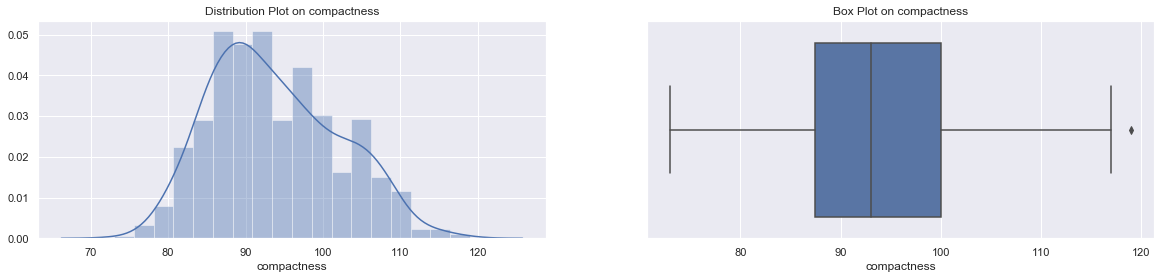

In [689]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['compactness'], ax=ax1)
ax1.set_title("Distribution Plot on compactness")

sns.boxplot(vehicle_df['compactness'], ax=ax2)
ax2.set_title("Box Plot on compactness")

In [690]:
OutlierDetection(vehicle_df['compactness'])

25th Quantile value:  87.5
Outlier low Count = 0
List of Low outliers: 

Series([], Name: compactness, dtype: float64)
75th Quantile value:  100.0
Outlier High Count =  1
List of High outliers: 

44    119.0
Name: compactness, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>row 44 has high outlier</li>
<li>let's check what we have in row 44</li>
</ul>
</font>

In [691]:
vehicle_df.loc[[44]]

compactness  circularity  distance_circularity  radius_ratio  \
44        119.0         54.0                 106.0         220.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                  65.0                     12.0          213.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44           31.0                    24.0                      167.0   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44            223.0              675.0                      232.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                         66.0            20.0               1.0   

    skewness_about.2  hollows_ratio  class  
44             192.0          202.0    1.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 44 belong to class car, let's observe few other rows of class car in terms of max value</li>
</ul>
</font>

In [692]:
vehicle_df[vehicle_df['class']==1]['compactness'].sort_values( ascending=False).head(5)

44     119.0
346    117.0
283    116.0
505    115.0
788    115.0
Name: compactness, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are values of 116, 117. this outlier 119 is not far from these values, so we leave this as it is</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : circularity
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on circularity')

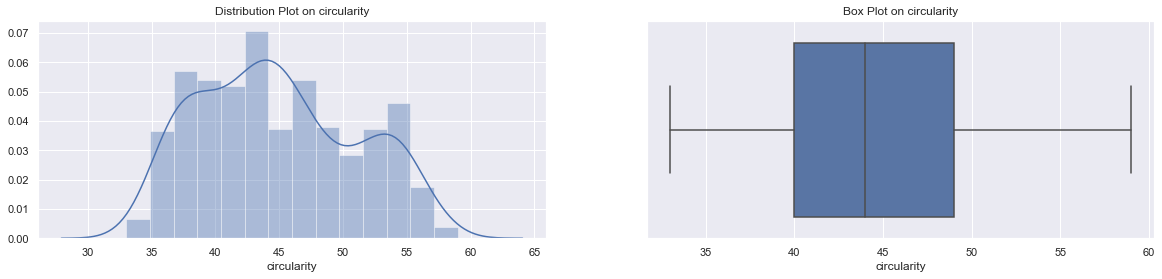

In [693]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['circularity'], ax=ax1)
ax1.set_title("Distribution Plot on circularity")

sns.boxplot(vehicle_df['circularity'], ax=ax2)
ax2.set_title("Box Plot on circularity")

In [694]:
OutlierDetection(vehicle_df['circularity'])

25th Quantile value:  40.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: circularity, dtype: float64)
75th Quantile value:  49.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: circularity, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in circularity</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : distance_circularity
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on distance_circularity')

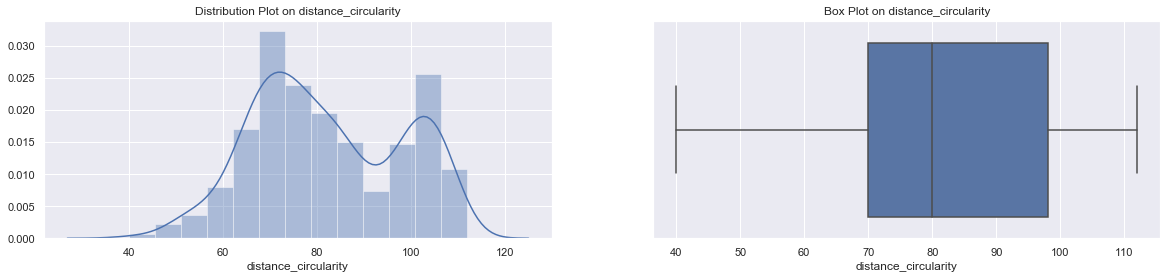

In [695]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['distance_circularity'], ax=ax1)
ax1.set_title("Distribution Plot on distance_circularity")

sns.boxplot(vehicle_df['distance_circularity'], ax=ax2)
ax2.set_title("Box Plot on distance_circularity")

In [696]:
OutlierDetection(vehicle_df['distance_circularity'])

25th Quantile value:  70.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: distance_circularity, dtype: float64)
75th Quantile value:  98.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: distance_circularity, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in distance_circularity</li>
<li>in distribution two peaks are seen and right skewed due to long tail on right side</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : radius_ratio
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on radius_ratio')

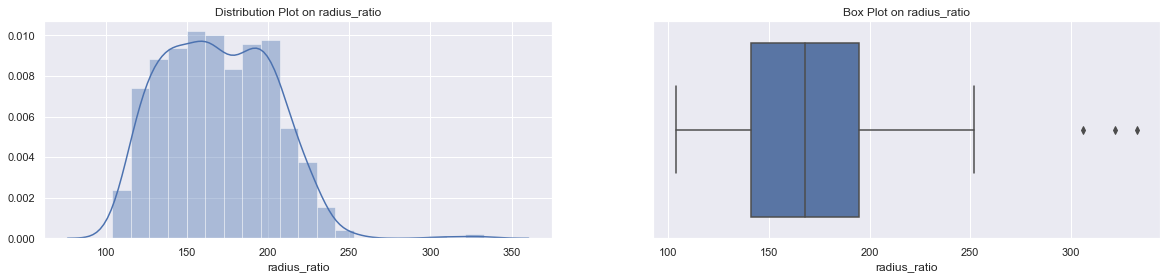

In [697]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['radius_ratio'], ax=ax1)
ax1.set_title("Distribution Plot on radius_ratio")

sns.boxplot(vehicle_df['radius_ratio'], ax=ax2)
ax2.set_title("Box Plot on radius_ratio")

In [698]:
OutlierDetection(vehicle_df['radius_ratio'])

25th Quantile value:  141.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: radius_ratio, dtype: float64)
75th Quantile value:  195.0
Outlier High Count =  3
List of High outliers: 

37     306.0
135    322.0
388    333.0
Name: radius_ratio, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 37, 135, 388. let's check what we have in the rows</li>
</ul>
</font>

In [699]:
vehicle_df.loc[[37, 135, 388]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         306.0   
135         89.0         47.0                  83.0         322.0   
388         94.0         47.0                  85.0         333.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
388             188.0          196.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>all these rows belong to class van, let's observe few other rows of class van in terms of max value</li>
</ul>
</font>

In [700]:
vehicle_df[vehicle_df['class']==2]['radius_ratio'].sort_values( ascending=False).head(6)

388    333.0
135    322.0
37     306.0
706    250.0
291    246.0
523    231.0
Name: radius_ratio, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>these outliers are far away from max value 250, so we will replace these outliers with max value 250.0</li>
</ul>
</font>

In [701]:
vehicle_df.loc[[37,135,388],'radius_ratio']=250.0

In [702]:
vehicle_df.loc[[37,135,388]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         250.0   
135         89.0         47.0                  83.0         250.0   
388         94.0         47.0                  85.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                  126.0                     49.0          153.0   
135                 133.0                     48.0          158.0   
388                 138.0                     49.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
388             188.0          196.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : pr.axis_aspect_ratio
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on pr.axis_aspect_ratio')

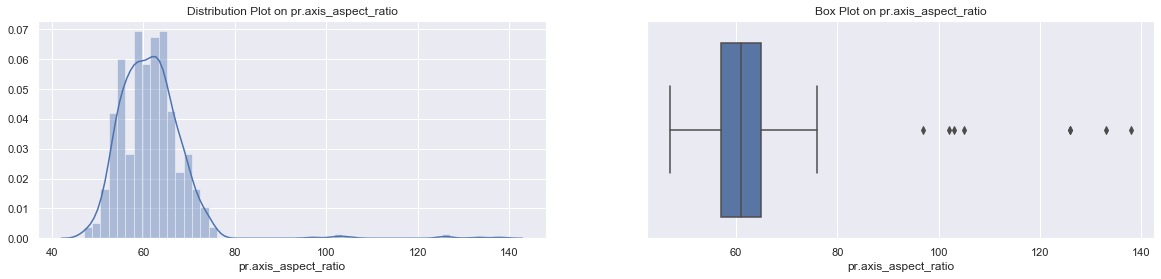

In [703]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['pr.axis_aspect_ratio'], ax=ax1)
ax1.set_title("Distribution Plot on pr.axis_aspect_ratio")

sns.boxplot(vehicle_df['pr.axis_aspect_ratio'], ax=ax2)
ax2.set_title("Box Plot on pr.axis_aspect_ratio")

In [704]:
OutlierDetection(vehicle_df['pr.axis_aspect_ratio'])

25th Quantile value:  57.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: pr.axis_aspect_ratio, dtype: float64)
75th Quantile value:  65.0
Outlier High Count =  8
List of High outliers: 

4      103.0
37     126.0
100    126.0
135    133.0
291    102.0
388    138.0
523     97.0
706    105.0
Name: pr.axis_aspect_ratio, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 4, 37, 100, 135, 291, 388, 523, 706. let's check what we have in the rows</li>
</ul>
</font>

In [705]:
vehicle_df.loc[[4, 37, 100, 135, 291, 388, 523, 706]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         250.0   
100         82.0         45.0                  66.0         252.0   
135         89.0         47.0                  83.0         250.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         250.0   
523         90.0         43.0                  81.0         231.0   
706         82.0         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                   103.0                     52.0          149.0   
37                  126.0                     49.0          153.0   
100                 126.0                     52.0          148.0   
135                 133.0                     48.0          158.0   
291                 102.0                     43.0          155.0   
388                 138.0                     49.0          155.0   
523                  97.0                     46.0          150.0   
706                 105.0                     55.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
523           45.0                    19.0                      149.0   
706           48.0                    18.0                      145.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
37              185.0          194.0    2.0  
100             181.0          185.0    0.0  
135             184.0          194.0    2.0  
291             183.0          192.0    2.0  
388             188.0          196.0    2.0  
523             186.0          196.0    2.0  
706             190.0          199.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 4, 100 belong to class bus, let's observe few other rows of class van in terms of max value</li>
<li>row 37, 135, 291, 388, 523, 706 belong to class van, let's observe few other rows of class van in terms of max value</li>
</ul>
</font>

In [706]:
vehicle_df[vehicle_df['class']==0]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(5)

100    126.0
4      103.0
84      76.0
450     75.0
641     75.0
Name: pr.axis_aspect_ratio, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>these outliers are far away from max value 76, so we will replace these outliers with max value 76.0</li>
</ul>
</font>

In [707]:
vehicle_df.loc[[4,100],'pr.axis_aspect_ratio']=76.0

In [708]:
vehicle_df.loc[[4,100]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
100         82.0         45.0                  66.0         252.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                    76.0                     52.0          149.0   
100                  76.0                     52.0          148.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
100           45.0                    19.0                      144.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
100            237.0              326.0                      185.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
100                        119.0             1.0               1.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
100             181.0          185.0    0.0

In [709]:
vehicle_df[vehicle_df['class']==2]['pr.axis_aspect_ratio'].sort_values( ascending=False).head(10)

388    138.0
135    133.0
37     126.0
706    105.0
291    102.0
523     97.0
0       72.0
668     70.0
732     69.0
149     69.0
Name: pr.axis_aspect_ratio, dtype: float64

In [710]:
vehicle_df.loc[[37, 135, 291, 388, 523, 706],'pr.axis_aspect_ratio']=97.0

In [711]:
vehicle_df.loc[[37, 135, 291, 388, 523, 706]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         250.0   
135         89.0         47.0                  83.0         250.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         250.0   
523         90.0         43.0                  81.0         231.0   
706         82.0         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                   97.0                     49.0          153.0   
135                  97.0                     48.0          158.0   
291                  97.0                     43.0          155.0   
388                  97.0                     49.0          155.0   
523                  97.0                     46.0          150.0   
706                  97.0                     55.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
523           45.0                    19.0                      149.0   
706           48.0                    18.0                      145.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
291             183.0          192.0    2.0  
388             188.0          196.0    2.0  
523             186.0          196.0    2.0  
706             190.0          199.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : max.length_aspect_ratio
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on max.length_aspect_ratio')

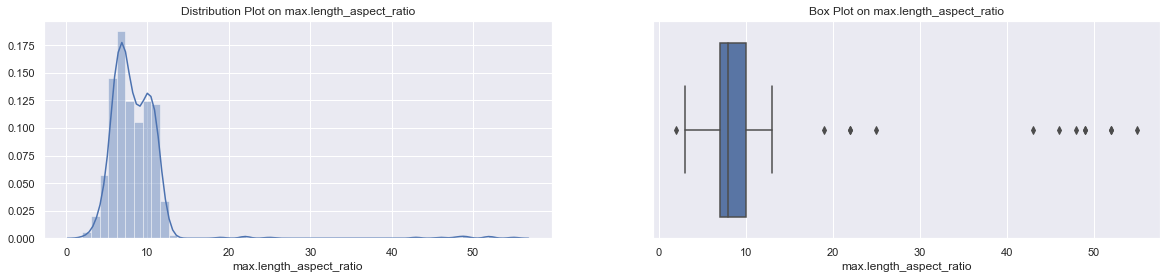

In [712]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['max.length_aspect_ratio'], ax=ax1)
ax1.set_title("Distribution Plot on max.length_aspect_ratio")

sns.boxplot(vehicle_df['max.length_aspect_ratio'], ax=ax2)
ax2.set_title("Box Plot on max.length_aspect_ratio")

In [713]:
OutlierDetection(vehicle_df['max.length_aspect_ratio'])

25th Quantile value:  7.0
Outlier low Count = 1
List of Low outliers: 

655    2.0
Name: max.length_aspect_ratio, dtype: float64
75th Quantile value:  10.0
Outlier High Count =  12
List of High outliers: 

4      52.0
37     49.0
100    52.0
127    22.0
135    48.0
291    43.0
388    49.0
391    25.0
523    46.0
544    19.0
706    55.0
815    22.0
Name: max.length_aspect_ratio, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 4, 37, 100, 127, 135, 291, 388, 391, 523, 544, 706, 815. let's check what we have in the rows</li>
</ul>
</font>

In [714]:
vehicle_df.loc[[4, 37, 100, 127, 135, 291, 388, 391, 523, 544, 706, 815]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         250.0   
100         82.0         45.0                  66.0         252.0   
127         85.0         41.0                  66.0         155.0   
135         89.0         47.0                  83.0         250.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         250.0   
391         91.0         38.0                  70.0         160.0   
523         90.0         43.0                  81.0         231.0   
544         88.0         43.0                  70.0         177.0   
706         82.0         43.0                  70.0         250.0   
815         81.0         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                    76.0                     52.0          149.0   
37                   97.0                     49.0          153.0   
100                  76.0                     52.0          148.0   
127                  65.0                     22.0          149.0   
135                  97.0                     48.0          158.0   
291                  97.0                     43.0          155.0   
388                  97.0                     49.0          155.0   
391                  66.0                     25.0          140.0   
523                  97.0                     46.0          150.0   
544                  74.0                     19.0          152.0   
706                  97.0                     55.0          139.0   
815                  69.0                     22.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
100           45.0                    19.0                      144.0   
127           45.0                    19.0                      139.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
391           47.0                    18.0                      139.0   
523           45.0                    19.0                      149.0   
544           44.0                    19.0                      143.0   
706           48.0                    18.0                      145.0   
815           45.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
544            180.0              342.0                      168.0   
706            231.0              289.0                      172.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
37                         118.0             0.0              15.0   
100                        119.0             1.0               1.0   
127                         75.0             6.0              16.0  

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 4, 100, 127, 544, 815 belong to class bus, let's observe few other rows of class van in terms of max value</li>
<li>row 37, 135, 291, 388, 391, 523, 706 belong to class van, let's observe few other rows of class van in terms of max value</li>
</ul>
</font>

In [715]:
vehicle_df[vehicle_df['class']==0]['max.length_aspect_ratio'].sort_values( ascending=False).head(10)

4      52.0
100    52.0
815    22.0
127    22.0
544    19.0
108     8.0
592     8.0
590     8.0
141     8.0
553     8.0
Name: max.length_aspect_ratio, dtype: float64

In [716]:
vehicle_df.loc[[4, 100, 127, 544, 815],'max.length_aspect_ratio']=8

In [717]:
vehicle_df.loc[[4, 100, 127, 544, 815]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
100         82.0         45.0                  66.0         252.0   
127         85.0         41.0                  66.0         155.0   
544         88.0         43.0                  70.0         177.0   
815         81.0         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                    76.0                      8.0          149.0   
100                  76.0                      8.0          148.0   
127                  65.0                      8.0          149.0   
544                  74.0                      8.0          152.0   
815                  69.0                      8.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
100           45.0                    19.0                      144.0   
127           45.0                    19.0                      139.0   
544           44.0                    19.0                      143.0   
815           45.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
100            237.0              326.0                      185.0   
127            173.0              330.0                      155.0   
544            180.0              342.0                      168.0   
815            186.0              335.0                      186.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                          127.0             9.0              11.0   
100                        119.0             1.0               1.0   
127                         75.0             6.0              16.0   
544                         76.0             1.0               9.0   
815                         88.0             1.0              10.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
100             181.0          185.0    0.0  
127             184.0          191.0    0.0  
544             186.0          189.0    0.0  
815             180.0          185.0    0.0

In [718]:
vehicle_df[vehicle_df['class']==2]['max.length_aspect_ratio'].sort_values( ascending=False).head(10)

706    55.0
388    49.0
37     49.0
135    48.0
523    46.0
291    43.0
391    25.0
254    12.0
545    12.0
668    12.0
Name: max.length_aspect_ratio, dtype: float64

In [719]:
vehicle_df.loc[[37, 135, 291, 388, 391, 523, 706],'max.length_aspect_ratio']=12

In [720]:
vehicle_df.loc[[37, 135, 291, 388, 391, 523, 706]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         250.0   
135         89.0         47.0                  83.0         250.0   
291         89.0         45.0                  81.0         246.0   
388         94.0         47.0                  85.0         250.0   
391         91.0         38.0                  70.0         160.0   
523         90.0         43.0                  81.0         231.0   
706         82.0         43.0                  70.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                   97.0                     12.0          153.0   
135                  97.0                     12.0          158.0   
291                  97.0                     12.0          155.0   
388                  97.0                     12.0          155.0   
391                  66.0                     12.0          140.0   
523                  97.0                     12.0          150.0   
706                  97.0                     12.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
135           43.0                    20.0                      163.0   
291           44.0                    20.0                      160.0   
388           43.0                    19.0                      155.0   
391           47.0                    18.0                      139.0   
523           45.0                    19.0                      149.0   
706           48.0                    18.0                      145.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
135            229.0              364.0                      176.0   
291            200.0              347.0                      177.0   
388            320.0              354.0                      187.0   
391            162.0              296.0                      130.0   
523            200.0              332.0                      164.0   
706            231.0              289.0                      172.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                         118.0             0.0              15.0   
135                         97.0             0.0              14.0   
291                         90.0             9.0              17.0   
388                        135.0            12.0               9.0   
391                         67.0             4.0              11.0   
523                         91.0             5.0               9.0   
706                         99.0             4.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
135             184.0          194.0    2.0  
291             183.0          192.0    2.0  
388             188.0          196.0    2.0  
391             192.0          202.0    2.0  
523             186.0          196.0    2.0  
706             190.0          199.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : scatter_ratio
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on scatter_ratio')

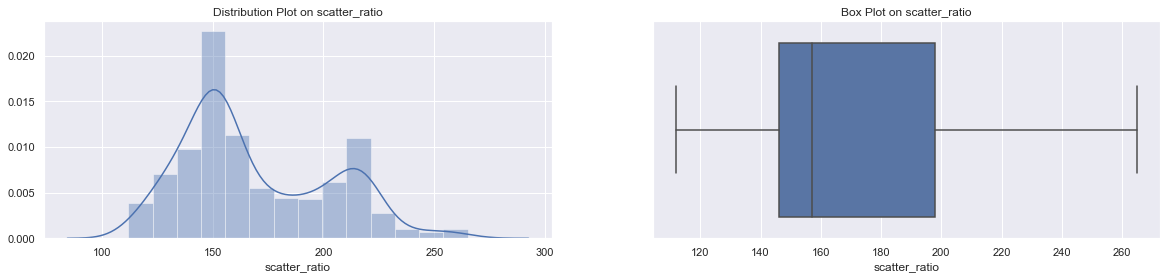

In [721]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['scatter_ratio'], ax=ax1)
ax1.set_title("Distribution Plot on scatter_ratio")

sns.boxplot(vehicle_df['scatter_ratio'], ax=ax2)
ax2.set_title("Box Plot on scatter_ratio")

In [722]:
OutlierDetection(vehicle_df['scatter_ratio'])

25th Quantile value:  146.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scatter_ratio, dtype: float64)
75th Quantile value:  198.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: scatter_ratio, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in scatter_ratio</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : elongatedness
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on elongatedness')

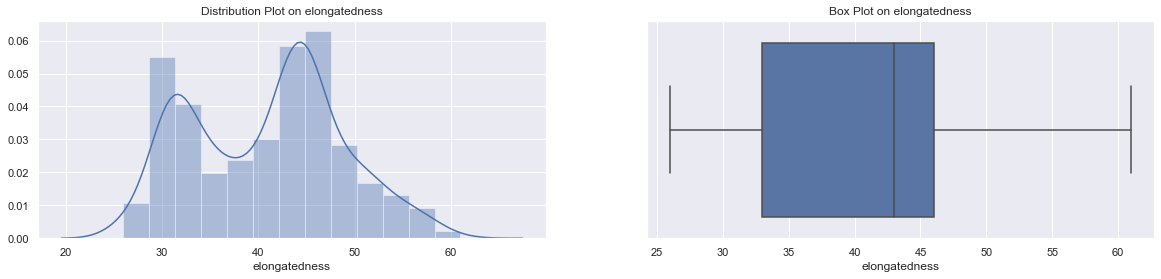

In [723]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['elongatedness'], ax=ax1)
ax1.set_title("Distribution Plot on elongatedness")

sns.boxplot(vehicle_df['elongatedness'], ax=ax2)
ax2.set_title("Box Plot on elongatedness")

In [724]:
OutlierDetection(vehicle_df['elongatedness'])

25th Quantile value:  33.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: elongatedness, dtype: float64)
75th Quantile value:  46.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: elongatedness, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in elongatedness</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : pr.axis_rectangularity
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on pr.axis_rectangularity')

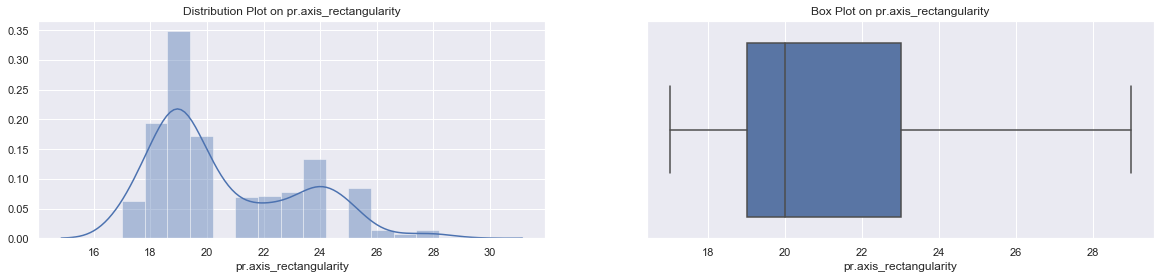

In [725]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['pr.axis_rectangularity'], ax=ax1)
ax1.set_title("Distribution Plot on pr.axis_rectangularity")

sns.boxplot(vehicle_df['pr.axis_rectangularity'], ax=ax2)
ax2.set_title("Box Plot on pr.axis_rectangularity")

In [726]:
OutlierDetection(vehicle_df['pr.axis_rectangularity'])

25th Quantile value:  19.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: pr.axis_rectangularity, dtype: float64)
75th Quantile value:  23.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: pr.axis_rectangularity, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in pr.axis_rectangularity</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : max.length_rectangularity
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on max.length_rectangularity')

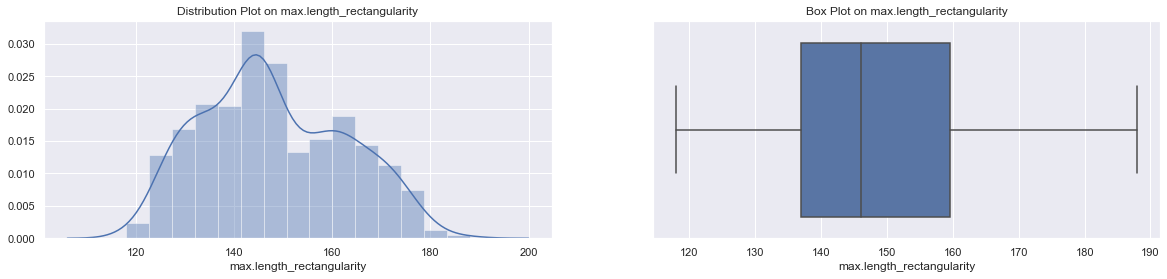

In [727]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['max.length_rectangularity'], ax=ax1)
ax1.set_title("Distribution Plot on max.length_rectangularity")

sns.boxplot(vehicle_df['max.length_rectangularity'], ax=ax2)
ax2.set_title("Box Plot on max.length_rectangularity")

In [728]:
OutlierDetection(vehicle_df['max.length_rectangularity'])

25th Quantile value:  137.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: max.length_rectangularity, dtype: float64)
75th Quantile value:  159.5
Outlier High Count =  0
List of High outliers: 

Series([], Name: max.length_rectangularity, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in max.length_rectangularity</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : scaled_variance
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on scaled_variance')

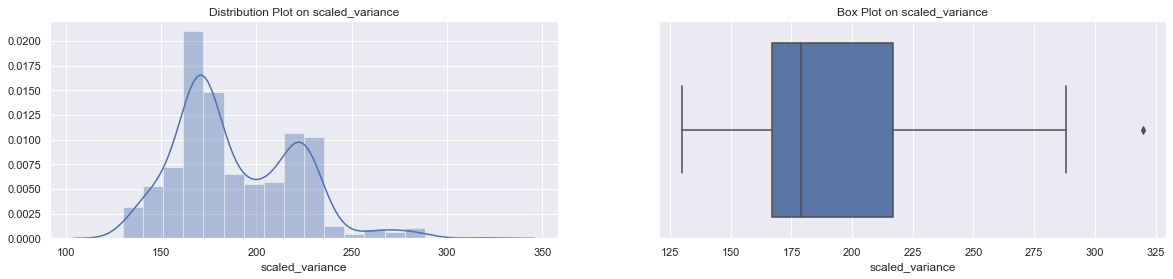

In [729]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['scaled_variance'], ax=ax1)
ax1.set_title("Distribution Plot on scaled_variance")

sns.boxplot(vehicle_df['scaled_variance'], ax=ax2)
ax2.set_title("Box Plot on scaled_variance")

In [730]:
OutlierDetection(vehicle_df['scaled_variance'])

25th Quantile value:  167.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_variance, dtype: float64)
75th Quantile value:  217.0
Outlier High Count =  1
List of High outliers: 

388    320.0
Name: scaled_variance, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 388. let's check what we have in the rows</li>
</ul>
</font>


In [731]:
vehicle_df.loc[[388]]

compactness  circularity  distance_circularity  radius_ratio  \
388         94.0         47.0                  85.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388                  97.0                     12.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            320.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
388             188.0          196.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 388 belong to class van, let's observe few other rows of class van in terms of max value</li>
</ul>
</font>

In [732]:
vehicle_df[vehicle_df['class']==2]['scaled_variance'].sort_values( ascending=False).head(5)

388    320.0
37     272.0
706    231.0
135    229.0
523    200.0
Name: scaled_variance, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>these outliers are far away from max value 272, so we will replace these outliers with max value 272.0</li>
</ul>
</font>

In [733]:
vehicle_df.loc[[388],'scaled_variance']=272.0

In [734]:
vehicle_df.loc[[388]]

compactness  circularity  distance_circularity  radius_ratio  \
388         94.0         47.0                  85.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
388                  97.0                     12.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
388            272.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
388                        135.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
388             188.0          196.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : scaled_variance.1
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on scaled_variance.1')

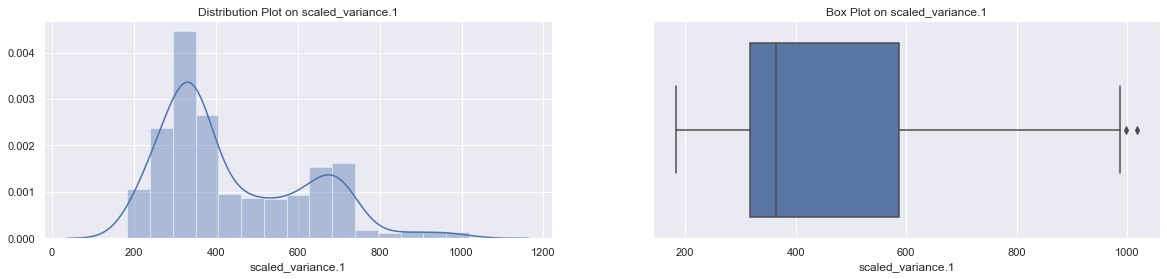

In [735]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['scaled_variance.1'], ax=ax1)
ax1.set_title("Distribution Plot on scaled_variance.1")

sns.boxplot(vehicle_df['scaled_variance.1'], ax=ax2)
ax2.set_title("Box Plot on scaled_variance.1")

In [736]:
OutlierDetection(vehicle_df['scaled_variance.1'])

25th Quantile value:  318.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_variance.1, dtype: float64)
75th Quantile value:  587.0
Outlier High Count =  2
List of High outliers: 

85      998.0
835    1018.0
Name: scaled_variance.1, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 85, 835. let's check what we have in the rows</li>
</ul>
</font>

In [737]:
vehicle_df.loc[[85, 835]]

compactness  circularity  distance_circularity  radius_ratio  \
85         110.0         58.0                 106.0         180.0   
835        111.0         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85                   51.0                      6.0          261.0   
835                  51.0                      6.0          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85            26.0                    28.0                      171.0   
835           26.0                    29.0                      174.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85             278.0              998.0                      257.0   
835            285.0             1018.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                          83.0             9.0              13.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio  class  
85              181.0          182.0    0.0  
835             181.0          183.0    0.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 85, 835 belong to class bus, let's observe few other rows of class bus in terms of max value</li>
</ul>
</font>

In [738]:
vehicle_df[vehicle_df['class']==0]['scaled_variance.1'].sort_values( ascending=False).head(5)

835    1018.0
85      998.0
687     987.0
321     982.0
733     968.0
Name: scaled_variance.1, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>these outliers are far away from max value 987, so we will replace these outliers with max value 987.0</li>
</ul>
</font>

In [739]:
vehicle_df.loc[[85, 835],'scaled_variance.1']=987.0

In [740]:
vehicle_df.loc[[85, 835]]

compactness  circularity  distance_circularity  radius_ratio  \
85         110.0         58.0                 106.0         180.0   
835        111.0         58.0                 105.0         183.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
85                   51.0                      6.0          261.0   
835                  51.0                      6.0          265.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
85            26.0                    28.0                      171.0   
835           26.0                    29.0                      174.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
85             278.0              987.0                      257.0   
835            285.0              987.0                      255.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
85                          83.0             9.0              13.0   
835                         85.0             4.0               8.0   

     skewness_about.2  hollows_ratio  class  
85              181.0          182.0    0.0  
835             181.0          183.0    0.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : scaled_radius_of_gyration
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on scaled_radius_of_gyration')

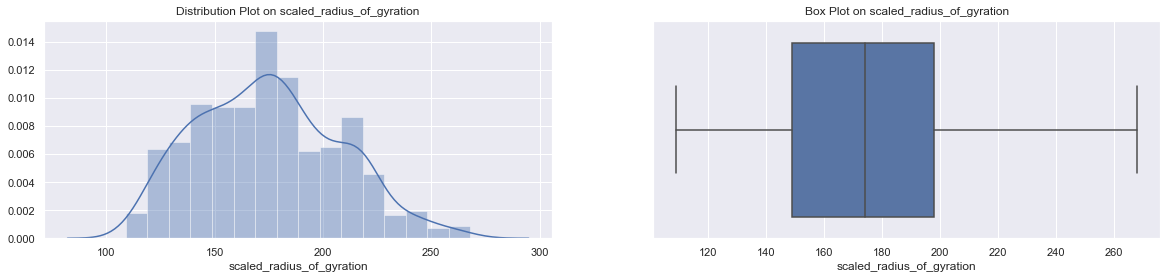

In [741]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['scaled_radius_of_gyration'], ax=ax1)
ax1.set_title("Distribution Plot on scaled_radius_of_gyration")

sns.boxplot(vehicle_df['scaled_radius_of_gyration'], ax=ax2)
ax2.set_title("Box Plot on scaled_radius_of_gyration")

In [742]:
OutlierDetection(vehicle_df['scaled_radius_of_gyration'])

25th Quantile value:  149.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_radius_of_gyration, dtype: float64)
75th Quantile value:  198.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: scaled_radius_of_gyration, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in scaled_radius_of_gyration</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : scaled_radius_of_gyration.1
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on scaled_radius_of_gyration.1')

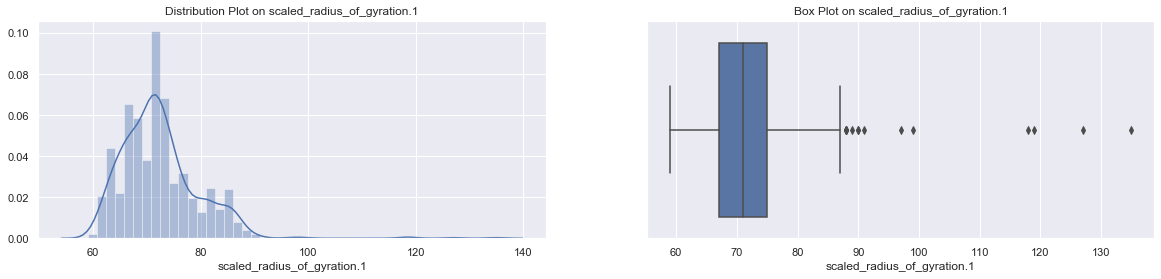

In [743]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['scaled_radius_of_gyration.1'], ax=ax1)
ax1.set_title("Distribution Plot on scaled_radius_of_gyration.1")

sns.boxplot(vehicle_df['scaled_radius_of_gyration.1'], ax=ax2)
ax2.set_title("Box Plot on scaled_radius_of_gyration.1")

In [744]:
OutlierDetection(vehicle_df['scaled_radius_of_gyration.1'])

25th Quantile value:  67.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: scaled_radius_of_gyration.1, dtype: float64)
75th Quantile value:  75.0
Outlier High Count =  15
List of High outliers: 

4      127.0
37     118.0
47      88.0
79      88.0
100    119.0
135     97.0
230     89.0
291     90.0
381     88.0
388    135.0
498     88.0
523     91.0
655     90.0
706     99.0
815     88.0
Name: scaled_radius_of_gyration.1, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 4, 37, 47, 79, 100, 135, 230, 291, 381, 388, 498, 523, 655, 706, 815. let's check what we have in the rows</li>
</ul>
</font>

In [745]:
vehicle_df.loc[[4, 37, 47, 79, 100, 135, 230, 291, 381, 388, 498, 523, 655, 706, 815]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
37          90.0         48.0                  86.0         250.0   
47          85.0         42.0                  66.0         122.0   
79          89.0         44.0                  68.0         113.0   
100         82.0         45.0                  66.0         252.0   
135         89.0         47.0                  83.0         250.0   
230         85.0         35.0                  47.0         110.0   
291         89.0         45.0                  81.0         246.0   
381        106.0         54.0                 100.0         227.0   
388         94.0         47.0                  85.0         250.0   
498         88.0         36.0                  53.0         113.0   
523         90.0         43.0                  81.0         231.0   
655         86.0         35.0                  44.0         110.0   
706         82.0         43.0                  70.0         250.0   
815         81.0         45.0                  68.0         154.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                    76.0                      8.0          149.0   
37                   97.0                     12.0          153.0   
47                   54.0                      6.0          148.0   
79                   50.0                      7.0          150.0   
100                  76.0                      8.0          148.0   
135                  97.0                     12.0          158.0   
230                  55.0                      3.0          117.0   
291                  97.0                     12.0          155.0   
381                  67.0                      4.0          250.0   
388                  97.0                     12.0          155.0   
498                  57.0                      3.0          118.0   
523                  97.0                     12.0          150.0   
655                  54.0                      2.0          119.0   
706                  97.0                     12.0          139.0   
815                  69.0                      8.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
37            44.0                    19.0                      156.0   
47            46.0                    19.0                      141.0   
79            45.0                    19.0                      147.0   
100           45.0                    19.0                      144.0   
135           43.0                    20.0                      163.0   
230           57.0                    17.0                      122.0   
291           44.0                    20.0                      160.0   
381           27.0                    27.0                      162.0   
388           43.0                    19.0                      155.0   
498           57.0                    17.0                      128.0   
523           45.0                    19.0                      149.0   
655           57.0                    17.0                      121.0   
706           48.0                    18.0                      145.0   
815           45.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
37             272.0              346.0                      200.0   
47             172.0              317.0                      174.0   
79             171.0              328.0                      189.0   
100            237.0              326.0                      185.0   
135            229.0              364.0                      176.0   
230            136.0              203.0                      139.0   
291            200.0              347.0                      177.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 4, 47, 79, 100, 381, 815 belong to class bus, let's observe few other rows of class bus in terms of max value</li>
<li>row 37, 135, 230, 291, 388, 498, 523, 655, 706 belong to class van, let's observe few other rows of class van in terms of max value</li>
</ul>
</font>

In [746]:
vehicle_df[vehicle_df['class']==0]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(10)

4      127.0
100    119.0
815     88.0
47      88.0
79      88.0
381     88.0
568     87.0
396     87.0
790     87.0
558     87.0
Name: scaled_radius_of_gyration.1, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>rows 4, 100 are far away from max value 88, so we will replace these outliers with max value 88.0</li>
</ul>
</font>

In [747]:
vehicle_df.loc[[4, 100],'scaled_radius_of_gyration.1']=88.0

In [748]:
vehicle_df.loc[[4, 100]]

compactness  circularity  distance_circularity  radius_ratio  \
4           85.0         44.0                  70.0         205.0   
100         82.0         45.0                  66.0         252.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                    76.0                      8.0          149.0   
100                  76.0                      8.0          148.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4             45.0                    19.0                      144.0   
100           45.0                    19.0                      144.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
4              241.0              325.0                      188.0   
100            237.0              326.0                      185.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
4                           88.0             9.0              11.0   
100                         88.0             1.0               1.0   

     skewness_about.2  hollows_ratio  class  
4               180.0          183.0    0.0  
100             181.0          185.0    0.0

In [749]:
vehicle_df[vehicle_df['class']==2]['scaled_radius_of_gyration.1'].sort_values( ascending=False).head(5)

388    135.0
37     118.0
706     99.0
135     97.0
523     91.0
Name: scaled_radius_of_gyration.1, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>rows 37, 388 are far away from max value 99, so we will replace these outliers with max value 99.0</li>
</ul>
</font>

In [750]:
vehicle_df.loc[[37, 388],'scaled_radius_of_gyration.1']=99.0

In [751]:
vehicle_df.loc[[37, 388]]

compactness  circularity  distance_circularity  radius_ratio  \
37          90.0         48.0                  86.0         250.0   
388         94.0         47.0                  85.0         250.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
37                   97.0                     12.0          153.0   
388                  97.0                     12.0          155.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
37            44.0                    19.0                      156.0   
388           43.0                    19.0                      155.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
37             272.0              346.0                      200.0   
388            272.0              354.0                      187.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
37                          99.0             0.0              15.0   
388                         99.0            12.0               9.0   

     skewness_about.2  hollows_ratio  class  
37              185.0          194.0    2.0  
388             188.0          196.0    2.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : skewness_about
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on skewness_about')

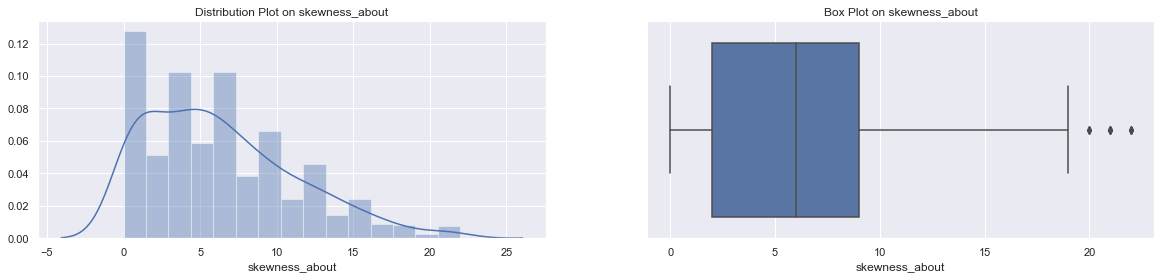

In [752]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['skewness_about'], ax=ax1)
ax1.set_title("Distribution Plot on skewness_about")

sns.boxplot(vehicle_df['skewness_about'], ax=ax2)
ax2.set_title("Box Plot on skewness_about")

In [753]:
OutlierDetection(vehicle_df['skewness_about'])

25th Quantile value:  2.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: skewness_about, dtype: float64)
75th Quantile value:  9.0
Outlier High Count =  12
List of High outliers: 

44     20.0
113    21.0
123    22.0
190    20.0
346    21.0
400    21.0
505    21.0
516    22.0
623    22.0
761    22.0
796    20.0
797    21.0
Name: skewness_about, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 44, 113, 123, 190, 346, 400, 505, 516, 623, 761, 796, 797. let's check what we have in the rows</li>
</ul>
</font>

In [754]:
vehicle_df.loc[[44, 113, 123, 190, 346, 400, 505, 516, 623, 761, 796, 797]]

compactness  circularity  distance_circularity  radius_ratio  \
44         119.0         54.0                 106.0         220.0   
113         88.0         35.0                  50.0         121.0   
123         90.0         36.0                  57.0         130.0   
190         97.0         48.0                  94.0         198.0   
346        117.0         52.0                 110.0         228.0   
400        107.0         53.0                 108.0         213.0   
505        115.0         53.0                 100.0         205.0   
516         92.0         42.0                  75.0         172.0   
623        106.0         52.0                 108.0         207.0   
761        115.0         51.0                 100.0         201.0   
796         85.0         38.0                  63.0         130.0   
797        111.0         53.0                 108.0         211.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
44                   65.0                     12.0          213.0   
113                  58.0                      5.0          114.0   
123                  57.0                      6.0          121.0   
190                  63.0                      9.0          181.0   
346                  65.0                     12.0          212.0   
400                  64.0                     12.0          206.0   
505                  64.0                     11.0          220.0   
516                  60.0                      8.0          147.0   
623                  64.0                     12.0          221.0   
761                  60.0                     12.0          196.0   
796                  55.0                      7.0          122.0   
797                  61.0                     11.0          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
44            31.0                    24.0                      167.0   
113           59.0                    17.0                      122.0   
123           56.0                    17.0                      127.0   
190           36.0                    21.0                      155.0   
346           31.0                    24.0                      163.0   
400           32.0                    23.0                      163.0   
505           30.0                    25.0                      166.0   
516           45.0                    19.0                      142.0   
623           31.0                    25.0                      168.0   
761           34.0                    23.0                      162.0   
796           55.0                    17.0                      130.0   
797           32.0                    23.0                      167.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
44             223.0              675.0                      232.0   
113            132.0              192.0                      138.0   
123            137.0              216.0                      132.0   
190            200.0              494.0                      189.0   
346            228.0              668.0                      220.0   
400            216.0              627.0                      202.0   
505            229.0              710.0                      214.0   
516            174.0              322.0                      160.0   
623            229.0              709.0                      200.0   
761            207.0              573.0                      184.0   
796            137.0              219.0                      144.0   
797            217.0              636.0                      216.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
44                          66.0            20.0               1.0   
113                         74.0            21.0               4.0   
123                         68.0            22.0              23.0   
190                         64.0            20.0              11.0  

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>all these rows belong to class car, let's observe few other rows of class car in terms of max value</li>
</ul>
</font>

In [755]:
vehicle_df[vehicle_df['class']==1]['skewness_about'].sort_values( ascending=False).head(15)

123    22.0
761    22.0
516    22.0
623    22.0
797    21.0
346    21.0
400    21.0
505    21.0
113    21.0
44     20.0
190    20.0
796    20.0
196    19.0
662    19.0
326    19.0
Name: skewness_about, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>these outliers are close to max value 19, so we will leave these as it is</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : skewness_about.1
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on skewness_about.1')

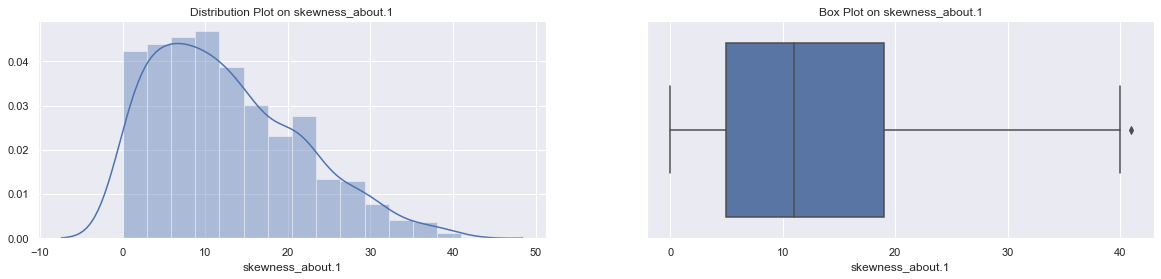

In [756]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['skewness_about.1'], ax=ax1)
ax1.set_title("Distribution Plot on skewness_about.1")

sns.boxplot(vehicle_df['skewness_about.1'], ax=ax2)
ax2.set_title("Box Plot on skewness_about.1")

In [757]:
OutlierDetection(vehicle_df['skewness_about.1'])

25th Quantile value:  5.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: skewness_about.1, dtype: float64)
75th Quantile value:  19.0
Outlier High Count =  1
List of High outliers: 

132    41.0
Name: skewness_about.1, dtype: float64


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>outliers seen in row 132. let's check what we have in the rows</li>
</ul>
</font>

In [758]:
vehicle_df.loc[[132]]

compactness  circularity  distance_circularity  radius_ratio  \
132         97.0         42.0                 101.0         186.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
132                  59.0                      9.0          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
132           36.0                    22.0                      138.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
132            208.0              511.0                      168.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
132                         67.0             7.0              41.0   

     skewness_about.2  hollows_ratio  class  
132             194.0          206.0    1.0

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
<ul>
<li>row 132 belong to class car, let's observe few other rows of class car in terms of max value</li>
</ul>
</font>

In [759]:
vehicle_df[vehicle_df['class']==1]['skewness_about.1'].sort_values( ascending=False).head(5)

132    41.0
513    40.0
142    39.0
33     38.0
98     38.0
Name: skewness_about.1, dtype: float64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>this outlier is close to max value 40, so we will leave these as it is</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : skewness_about.2
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on skewness_about.2')

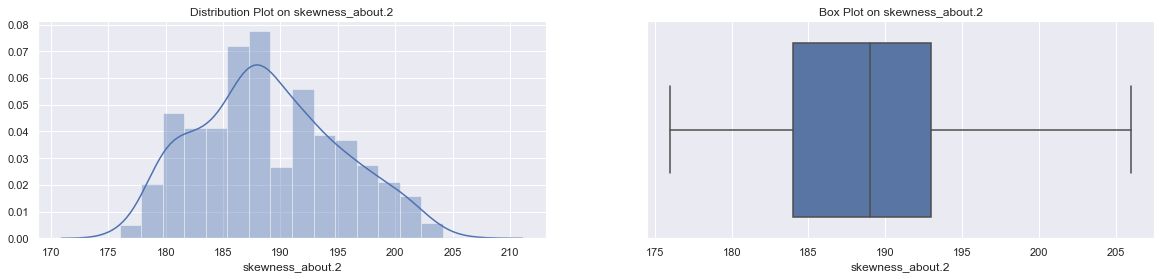

In [760]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['skewness_about.2'], ax=ax1)
ax1.set_title("Distribution Plot on skewness_about.2")

sns.boxplot(vehicle_df['skewness_about.2'], ax=ax2)
ax2.set_title("Box Plot on skewness_about.2")

In [761]:
OutlierDetection(vehicle_df['skewness_about.2'])

25th Quantile value:  184.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: skewness_about.2, dtype: float64)
75th Quantile value:  193.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: skewness_about.2, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in skewness_about.2</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Plot & Outlier Detection / Treatment on column : hollows_ratio
<font color=darkblue>
</font>

Text(0.5, 1.0, 'Box Plot on hollows_ratio')

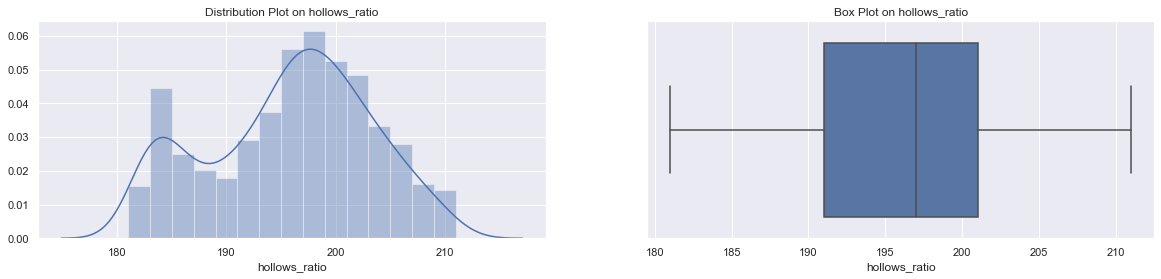

In [762]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_df['hollows_ratio'], ax=ax1)
ax1.set_title("Distribution Plot on hollows_ratio")

sns.boxplot(vehicle_df['hollows_ratio'], ax=ax2)
ax2.set_title("Box Plot on hollows_ratio")

In [763]:
OutlierDetection(vehicle_df['hollows_ratio'])

25th Quantile value:  191.0
Outlier low Count = 0
List of Low outliers: 

Series([], Name: hollows_ratio, dtype: float64)
75th Quantile value:  201.0
Outlier High Count =  0
List of High outliers: 

Series([], Name: hollows_ratio, dtype: float64)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>there are no outliers in hollows_ratio</li>
</ul>
</font>

In [764]:
vehicle_df.shape

(839, 19)

In [765]:
vehicle_df.describe().T

count        mean         std    min    25%  \
compactness                  839.0   93.709178    8.218746   73.0   87.5   
circularity                  839.0   44.839094    6.144567   33.0   40.0   
distance_circularity         839.0   82.138856   15.744684   40.0   70.0   
radius_ratio                 839.0  168.866508   32.450312  104.0  141.0   
pr.axis_aspect_ratio         839.0   61.476758    6.418509   47.0   57.0   
max.length_aspect_ratio      839.0    8.151371    2.107996    2.0    7.0   
scatter_ratio                839.0  168.910608   33.255794  112.0  146.0   
elongatedness                839.0   40.905840    7.803796   26.0   33.0   
pr.axis_rectangularity       839.0   20.584029    2.591483   17.0   19.0   
max.length_rectangularity    839.0  148.013111   14.522752  118.0  137.0   
scaled_variance              839.0  188.696663   31.222946  130.0  167.0   
scaled_variance.1            839.0  440.013111  176.420119  184.0  318.0   
scaled_radius_of_gyration    839.0  174.697259   32.601944  109.0  149.0   
scaled_radius_of_gyration.1  839.0   72.249106    6.686371   59.0   67.0   
skewness_about               839.0    6.359952    4.916886    0.0    2.0   
skewness_about.1             839.0   12.617402    8.945485    0.0    5.0   
skewness_about.2             839.0  188.961859    6.133439  176.0  184.0   
hollows_ratio                839.0  195.692491    7.415286  181.0  191.0   
class                        839.0    0.983313    0.700976    0.0    0.0   

                               50%    75%    max  
compactness                   93.0  100.0  119.0  
circularity                   44.0   49.0   59.0  
distance_circularity          80.0   98.0  112.0  
radius_ratio                 168.0  195.0  252.0  
pr.axis_aspect_ratio          61.0   65.0   97.0  
max.length_aspect_ratio        8.0   10.0   13.0  
scatter_ratio                157.0  198.0  265.0  
elongatedness                 43.0   46.0   61.0  
pr.axis_rectangularity        20.0   23.0   29.0  
max.length_rectangularity    146.0  159.5  188.0  
scaled_variance              179.0  217.0  288.0  
scaled_variance.1            365.0  587.0  987.0  
scaled_radius_of_gyration    174.0  198.0  268.0  
scaled_radius_of_gyration.1   71.0   75.0   99.0  
skewness_about                 6.0    9.0   22.0  
skewness_about.1              11.0   19.0   41.0  
skewness_about.2             189.0  193.0  206.0  
hollows_ratio                197.0  201.0  211.0  
class                          1.0    1.0    2.0

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Split Data :
<font color=darkblue>
Split dataset into Train and Test Split with 70:30 ratio
</font>

In [766]:
X_Indepenent = vehicle_df.drop(['class'], axis=1)
Y_Target = vehicle_df[['class']]

In [767]:
t_size = 0.3
seed = 100

X_train, X_test, y_train, y_test = train_test_split(X_Indepenent, Y_Target, test_size=t_size, random_state=seed)

In [768]:
print('X train data {}' .format(X_train.shape))
print('X test data {}' .format(X_test.shape))
print('Y train data {}' .format(y_train.shape))
print('Y test data {}' .format(y_test.shape))

X train data (587, 18)
X test data (252, 18)
Y train data (587, 1)
Y test data (252, 1)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
Data split into train and test with 70:30 ratio
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Support Vector Machine :
<font color=darkblue>
</font>

In [769]:
model_svc = SVC(random_state=seed)
model_svc.fit(X_train, y_train)

SVC(random_state=100)

In [770]:
model_svc_y_predicted = model_svc.predict(X_test)
model_svc_score = model_svc.score(X_test, y_test)
model_svc_accuracy = accuracy_score(y_test, model_svc_y_predicted)
model_svc_cm = metrics.confusion_matrix(y_test, model_svc_y_predicted)
model_svc_cp = classification_report(y_test, model_svc_y_predicted)

In [771]:
print('Support Vector Machine Model Accuracy : %f' %model_svc_accuracy)
print('\nSupport Vector Machine Classification Report : \n', model_svc_cp)
print('\nSupport Vector Machine Confusion Matrix : \n', model_svc_cm)
print('True Positive : ', model_svc_cm[1][1])
print('False Positive : ', model_svc_cm[0][1])
print('False Negative : ', model_svc_cm[1][0])
print('True Negative : ', model_svc_cm[0][0])

##class_label = ["Positive", "Negative"]
##svc_cm = pd.DataFrame(model_svc_cm, index=class_label, columns=class_label)
##plt.title('Confusion Matrix for Support Vector Machine')
##sns.heatmap(svc_cm, cmap='magma',annot=True, fmt='d')
##plt.show()

Support Vector Machine Model Accuracy : 0.650794

Support Vector Machine Classification Report : 
               precision    recall  f1-score   support

         0.0       0.48      0.53      0.51        58
         1.0       0.77      0.74      0.76       124
         2.0       0.59      0.59      0.59        70

    accuracy                           0.65       252
   macro avg       0.62      0.62      0.62       252
weighted avg       0.66      0.65      0.65       252


Support Vector Machine Confusion Matrix : 
 [[31 24  3]
 [ 7 92 25]
 [26  3 41]]
True Positive :  92
False Positive :  24
False Negative :  7
True Negative :  31


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using Support Vector Machine Model is 65.0%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">KFold Validation :
<font color=darkblue>
</font>

In [772]:
num_folds = 20

kfold = KFold(n_splits=num_folds, random_state=seed)
model_kfold = LogisticRegression()
results_kfold = cross_val_score(model_kfold, X_Indepenent, Y_Target, cv=kfold)

print(results_kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results_kfold.mean()*100.0, results_kfold.std()*100.0))


[0.9047619  0.88095238 0.95238095 0.85714286 0.92857143 0.92857143
 0.83333333 0.92857143 0.85714286 0.9047619  0.85714286 0.88095238
 0.9047619  0.92857143 0.9047619  0.88095238 0.9047619  0.88095238
 0.92857143 0.92682927]
Accuracy: 89.872% (3.085%)


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>Accuracy using KFold Validation Model is 89.8%</li>
</ul>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - PCA & Dimensionality Reduction  :
<font color=darkblue>
</font>

In [773]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [774]:
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Covariance Matrix :
<font color=darkblue>
</font>

In [775]:
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00170648e+00  6.83370573e-01  7.97002613e-01  7.03238816e-01
   1.05476405e-01  4.83864632e-01  8.18933578e-01 -7.92876407e-01
   8.19223835e-01  6.75215494e-01  7.70911171e-01  8.23507058e-01
   5.77169005e-01 -2.64928437e-01  2.49870261e-01  1.65069948e-01
   2.89327695e-01  3.64683349e-01]
 [ 6.83370573e-01  1.00170648e+00  7.99208900e-01  6.41797472e-01
   1.81941374e-01  5.66047893e-01  8.50198930e-01 -8.20738159e-01
   8.45458654e-01  9.64452675e-01  7.93249428e-01  8.39707159e-01
   9.20111278e-01  4.71391778e-02  1.71477502e-01 -2.84798242e-02
  -1.07672820e-01  4.83599013e-02]
 [ 7.97002613e-01  7.99208900e-01  1.00170648e+00  7.88054822e-01
   1.95116646e-01  6.63778405e-01  9.06166316e-01 -9.10402129e-01
   8.92646006e-01  7.79028490e-01  8.63142610e-01  8.88955067e-01
   7.08405169e-01 -2.44483182e-01  1.31336905e-01  2.38007912e-01
   1.37559639e-01  3.25268919e-01]
 [ 7.03238816e-01  6.41797472e-01  7.88054822e-01  1.00170648e+00
   6.60137377e-

In [776]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72583553e-01  1.03229865e-01  1.58510776e-01  7.05038084e-02
  -1.75779035e-01  1.33460846e-01  2.96715114e-01 -7.21364332e-01
  -3.94019185e-01 -1.96399683e-01  1.69751586e-02  6.98961529e-02
   1.39403560e-01 -1.47524205e-03  6.85215246e-03 -3.68722033e-02
   8.93023356e-02  3.79384912e-03]
 [-2.89004079e-01 -1.19907325e-01  7.58747708e-02 -2.06399468e-01
   1.23864448e-01 -2.50432718e-02 -3.94445558e-01 -1.04403927e-01
  -1.12356425e-01  1.88960372e-01 -1.06223021e-01 -2.10102589e-01
   1.38716469e-01  3.09982556e-03  6.16571658e-02 -3.76178843e-01
  -2.63403402e-01  5.77565881e-01]
 [-3.02621202e-01  5.94164373e-02  4.98230336e-02  8.74259572e-02
   1.10848659e-01 -6.41336047e-03  1.42124414e-01  3.10063953e-01
  -1.78745878e-01 -2.35360851e-01 -7.97035141e-01  1.67758212e-01
  -3.48351548e-02  2.57088041e-03  3.53554150e-03  3.86290960e-02
  -1.03830095e-01 -4.28807173e-02]
 [-2.66694983e-01  1.85564611e-01 -3.19826976e-01 -8.56050735e-02
  -1.13660730e-01 -

In [777]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2         3         4         5         6  \
0  9.721389  3.252607  1.291082  1.175095  0.868014  0.754646  0.321381   

          7         8         9        10        11        12        13  \
0  0.221952  0.114471  0.087522  0.061509  0.045269  0.040282  0.000397   

         14        15        16        17  
0  0.006849  0.027757  0.023569  0.016925

In [778]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)  
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.9157089   71.95496386  79.11542208  85.63260775  90.44669173
  94.63202827  96.41443729  97.64540431  98.28027364  98.76567924
  99.10681306  99.35787725  99.5812868   99.73523167  99.86594735
  99.95981495  99.99780046 100.        ]


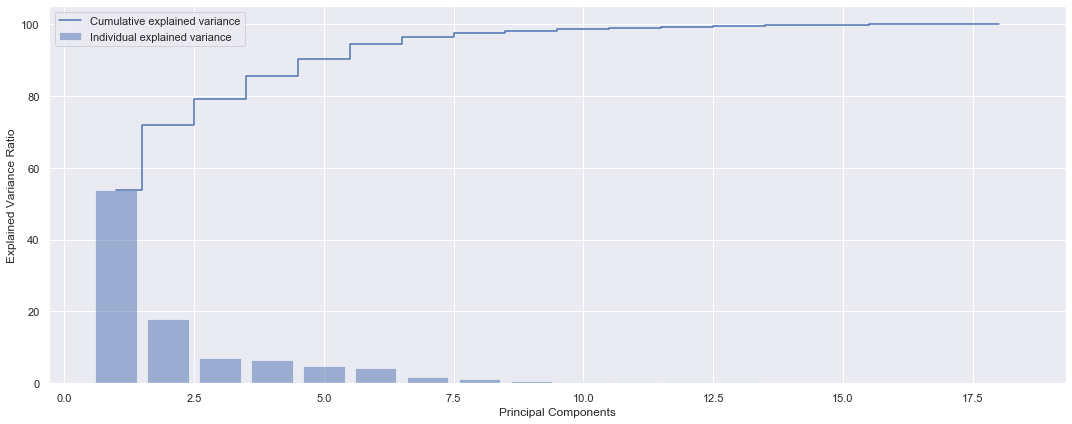

In [779]:
plt.figure(figsize=(15 , 6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>First 8 principal components explain 98% of the variance in the data</li>
</ul>
</font>

In [780]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue by default take first field for sorting
eig_pairs.sort(reverse=True)


# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]


In [781]:
#Dimesionality reduction 

P_reduce = np.array(eigvectors_sorted[0:8]).transpose()   # Selecting first 8 eigen vector out if 18

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors


In [782]:
#Check shapes of train and test new feature and target set after PCA
Proj_train_data.shape,y_train.shape,Proj_test_data.shape,y_test.shape

((587, 8), (587, 1), (252, 8), (252, 1))

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Modelling, Hyperparameter tuning & Cross Validation  :
<font color=darkblue>
Build Support Vector Machine Model using Principal Component
</font>

In [783]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [784]:
# check the accuracy on the training set
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))


0.8620102214650767
0.8492063492063492


In [785]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Confusion Matrix:
 [[ 50   9   3]
 [  5 102   5]
 [  3  13  62]]


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">
<font color=darkblue>
With rbf
</font>

In [786]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(Proj_train_data, y_train)

prediction = svc_model.predict(Proj_test_data)

In [787]:
print(svc_model.score(Proj_train_data, y_train))
print(svc_model.score(Proj_test_data, y_test))


0.9267461669505963
0.9246031746031746


In [788]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Confusion Matrix:
 [[ 54   3   0]
 [  1 112   3]
 [  3   9  67]]


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Hyper Parameter Tuning
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Model - Support Vector Machine :
<font color=darkblue>
With PCA
</font>

In [789]:
model_svm_pca = SVC(random_state=seed)

#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1], 
      #    'gamma':[0.01, 0.02 , 0.03 , 0.04, 0.05],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
gs = GridSearchCV(model_svm_pca, param_grid=params, n_jobs=-1,cv=10)
#Learning
gs.fit(Proj_train_data,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=100), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [790]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">KFold Validation :
<font color=darkblue>
With PCA
</font>

In [791]:
kfold = KFold(n_splits=num_folds, random_state=seed)
model_kfold_pca = gs
results_kfold_pca = cross_val_score(gs,Proj_train_data,y_train, cv=kfold)
print(results_kfold_pca)
print("Accuracy: %.3f%% (%.3f%%)" % (results_kfold_pca.mean()*100.0, results_kfold_pca.std()*100.0))

[0.8        0.9        0.93333333 0.93333333 0.93333333 0.93333333
 0.9        0.93103448 0.82758621 0.82758621 0.75862069 0.86206897
 0.96551724 0.93103448 1.         0.96551724 0.79310345 0.93103448
 0.93103448 0.89655172]
Accuracy: 89.770% (6.330%)


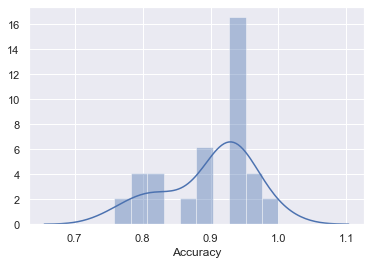

95.0 confidence interval 83.4% and 96.2%


In [792]:
#plt.hist(results,normed= True)
sns.distplot(results_kfold_pca,kde=True,bins=10)
plt.xlabel("Accuracy")
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
<ul>
<li>95.0 confidence interval 90.0% and 99.6%</li>
</ul>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Test Accuracy with Hypertuned parameter :
<font color=darkblue>
</font>

In [793]:
prediction=gs.predict(Proj_test_data)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

Accuracy: 0.9246031746031746
Confusion Matrix:
 [[ 54   1   3]
 [  3 112   9]
 [  0   3  67]]


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
<ul>
<li>Looking at the confusion matrix, model predicts all the vans correctly through Silhoutte(100%)</li>
<li>59/62 buses are predicted correctly(95 %)</li>
<li>129/138 cars are predicted correctyy(93.5%)</li>
<li>Test Accuracy(95.64%) is well in range of 95% confidence interval(86.8% to 99.6%)</li>
<li>PCA helps to reduce dimension data from 18 to 8</li>
</ul>
</font>